In [276]:
import pandas as pd
import numpy as np
train_df=pd.read_csv('C:/Users/User/Desktop/做品/aug_train.csv')
train_df2=pd.read_csv('C:/Users/User/Desktop/做品/aug_train.csv')
test_df=pd.read_csv('C:/Users/User/Desktop/做品/aug_test.csv')

<h1>員工離職預測
<h3>目標：分析並建立一預測模型，以能夠預測現有員工當中，那些員工可能具有離職可能性。
       
    

In [2]:
train_df.info() #訓練集資料

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [87]:
test_df.info() #預測資料

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
 13  target                  2129 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memo

In [4]:
print(train_df.isnull().sum()/19158) 
#發現資料集中，擁有遺漏值的現象。
#其中又以company_size與company_type所缺失的占比最高，將近30%左右
#As we can see, this data set has missing values.

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64


In [5]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns
def nom_plot(nom_col):
    nom_data=train_df[nom_col]
    nom_data_counts=nom_data.value_counts()
    plt.title(nom_col)
    plt.bar(nom_data_counts.index,nom_data_counts)
    print('{}:\n{}'.format(nom_col,nom_data_counts))
    print('{}:\n{}'.format(nom_col,nom_data_counts/19158))
    plt.show()

target:
0.0    14381
1.0     4777
Name: target, dtype: int64
target:
0.0    0.750652
1.0    0.249348
Name: target, dtype: float64


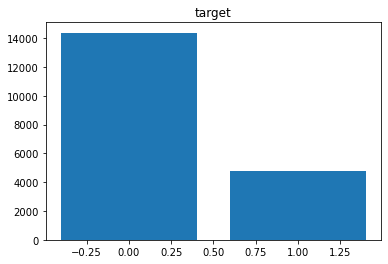

city:
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_121       3
city_129       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64
city:
city_103    0.227320
city_21     0.141038
city_16     0.080019
city_114    0.069736
city_160    0.044107
              ...   
city_111    0.000157
city_121    0.000157
city_129    0.000157
city_140    0.000052
city_171    0.000052
Name: city, Length: 123, dtype: float64


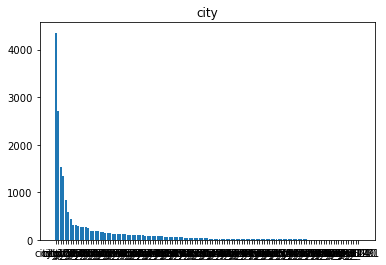

gender:
0.0    13221
1.0     1238
2.0      191
Name: gender, dtype: int64
gender:
0.0    0.690103
1.0    0.064621
2.0    0.009970
Name: gender, dtype: float64


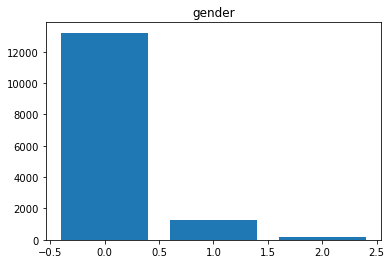

relevent_experience:
1    13792
0     5366
Name: relevent_experience, dtype: int64
relevent_experience:
1    0.719908
0    0.280092
Name: relevent_experience, dtype: float64


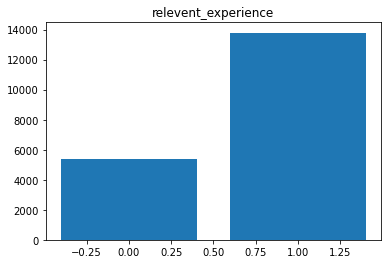

enrolled_university:
0.0    13817
2.0     3757
1.0     1198
Name: enrolled_university, dtype: int64
enrolled_university:
0.0    0.721213
2.0    0.196106
1.0    0.062533
Name: enrolled_university, dtype: float64


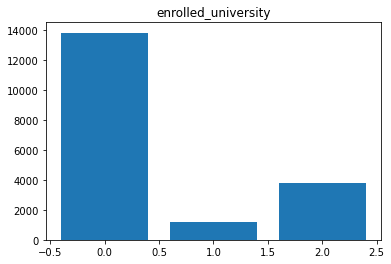

education_level:
2.0    11598
3.0     4361
1.0     2017
4.0      414
0.0      308
Name: education_level, dtype: int64
education_level:
2.0    0.605387
3.0    0.227633
1.0    0.105282
4.0    0.021610
0.0    0.016077
Name: education_level, dtype: float64


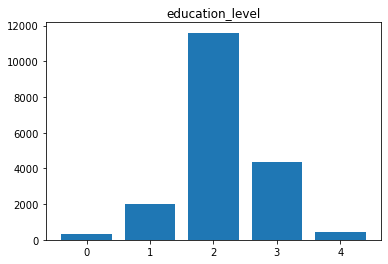

major_discipline:
0.0    14492
3.0      669
1.0      381
4.0      327
5.0      253
2.0      223
Name: major_discipline, dtype: int64
major_discipline:
0.0    0.756446
3.0    0.034920
1.0    0.019887
4.0    0.017069
5.0    0.013206
2.0    0.011640
Name: major_discipline, dtype: float64


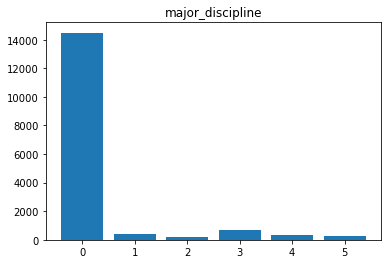

experience:
21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
1.0      549
0.0      522
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64
experience:
21.0    0.171521
5.0     0.074642
4.0     0.073233
3.0     0.070675
6.0     0.063472
2.0     0.058827
7.0     0.053659
10.0    0.051415
9.0     0.051154
8.0     0.041862
15.0    0.035807
11.0    0.034659
14.0    0.030588
1.0     0.028656
0.0     0.027247
16.0    0.026516
12.0    0.025786
13.0    0.020827
17.0    0.017852
19.0    0.015868
18.0    0.014615
20.0    0.007725
Name: experience, dtype: float64


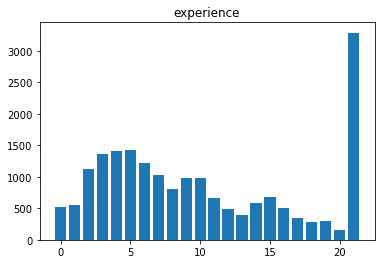

company_size:
2.0    3083
3.0    2571
7.0    2019
1.0    1471
5.0    1328
0.0    1308
4.0     877
6.0     563
Name: company_size, dtype: int64
company_size:
2.0    0.160925
3.0    0.134200
7.0    0.105387
1.0    0.076783
5.0    0.069318
0.0    0.068274
4.0    0.045777
6.0    0.029387
Name: company_size, dtype: float64


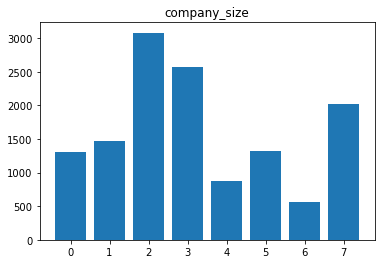

company_type:
0.0    9817
4.0    1001
1.0     955
5.0     603
3.0     521
2.0     121
Name: company_type, dtype: int64
company_type:
0.0    0.512423
4.0    0.052250
1.0    0.049849
5.0    0.031475
3.0    0.027195
2.0    0.006316
Name: company_type, dtype: float64


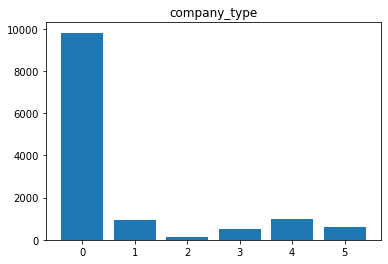

last_new_job:
1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: last_new_job, dtype: int64
last_new_job:
1.0    0.419668
5.0    0.171730
2.0    0.151373
0.0    0.127988
4.0    0.053711
3.0    0.053450
Name: last_new_job, dtype: float64


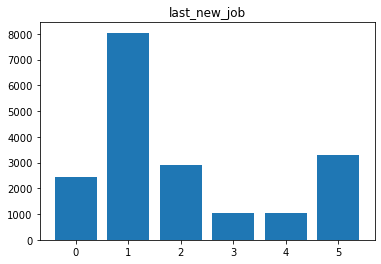

In [89]:
nom=['target','city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience',
    'company_size','company_type','last_new_job']
for i in nom:
    nom_plot(i)

    
##藉此除了可以了解各類別變項分布情形外，也發現到該資料集為不平衡資料集，因為我們的目標變項(target)可發現，會離職的員工僅占了25%左右而已。
## As we can see, this is an imbalanced dataset. So, we need to do resampling before we build the model.

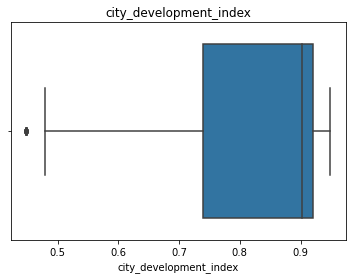

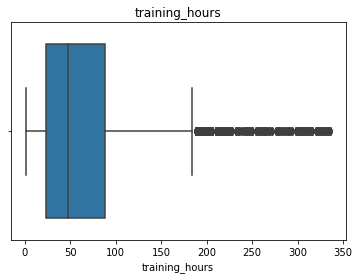

In [109]:
#從這裡可以發現有離群值的存在。
#理論上離群值的處理是相當重要，尤其若要使用線性相關的模型進行預測時，離群值的處理更為重要。
#以不平衡的資料集而言，若以刪除的方式處理離群值，則可能會因為過度的刪除，反而將一些有意義的資料刪除掉。因此建議的方式為進行資料標準化，或著刪除明顯不合理的資料。例如當城市發展指數(city_development_index)有出現大於1的數值時，則該筆資料很明確的就是人為輸入的錯誤，而所造成的離群值，這時我們就可以把它直接移除。
#呈上，若離群值的分佈合理時，可以利用資料標準化的方式控制，或是改用以樹為基底的模型進行建模與預測。
#以樹為基底的模型有常見的decision tree、Random Forest甚至XGBoost等，該類的模型都能夠處理離群值的影響。
def num_plot(nom_col):
    sns.boxplot(data=train_df,x=nom_col)
    plt.title(nom_col)
    plt.show()
num=['city_development_index','training_hours']
for i in num:
    num_plot(i)

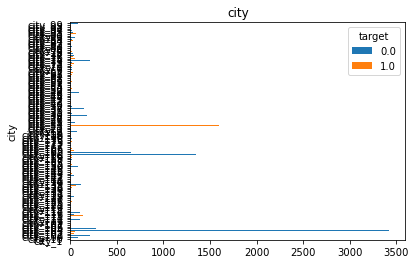

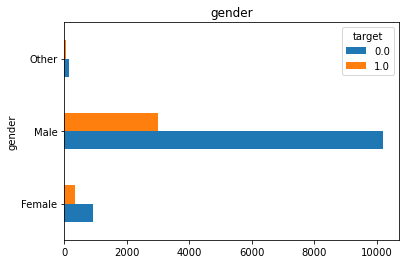

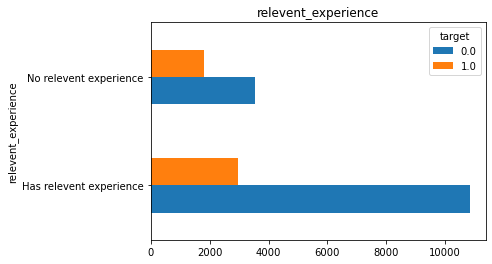

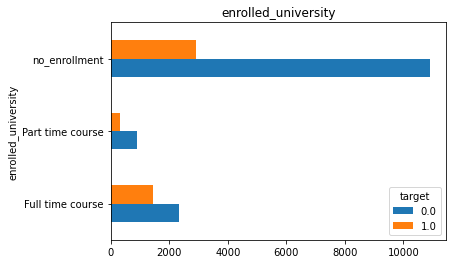

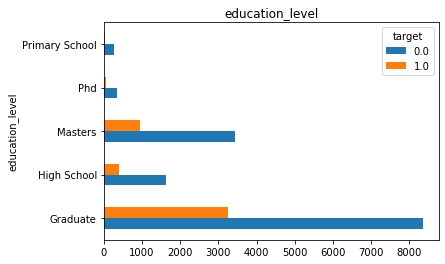

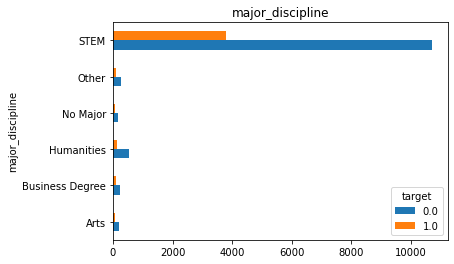

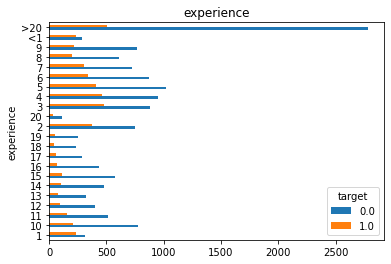

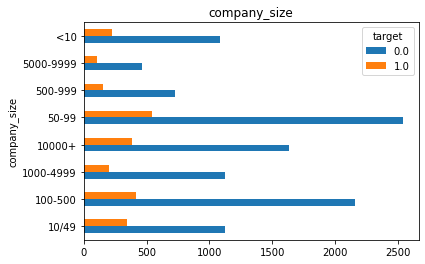

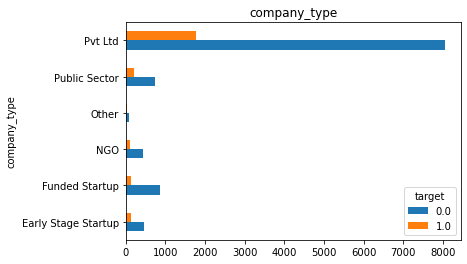

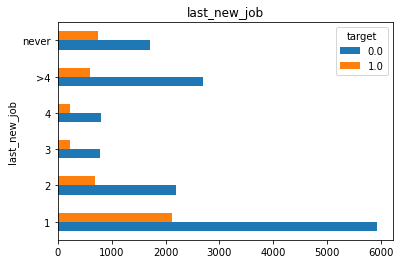

In [8]:
#藉此來更加的了解，會離職的員工，可能會有怎樣的特性。
#例如由工作經驗(experience)，似乎可以發現會選擇離職的員工，大多工作經歷落在10年內。
#另外與前一份工作的年距(last_new_job)，發現會離職的員工大多落在never與1年，意即社會新鮮人與資歷愈少的人，似乎有較高的離職意願。

#people who have work experience under 10 years seems to have higher intended to resign.
#people who haven't work experience before or only 1-year of work experience seem to have higher intentions to resign.
def nom_compare(nom_col):
    pd.crosstab(train_df[nom_col],train_df['target']).plot(kind='barh')
    plt.title(nom_col)
    plt.show()
for i in nom:
    nom_compare(i)

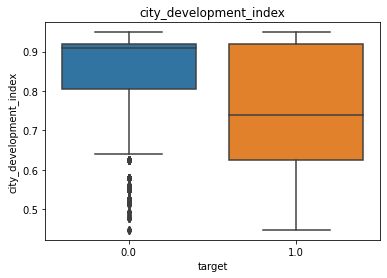

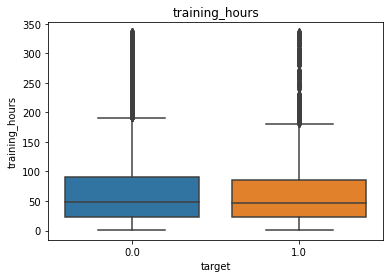

In [9]:
def num_compare(num_col):
    sns.boxplot(data=train_df,x=train_df['target'],y=train_df[num_col])
    plt.title(num_col)
    plt.show()
for i in num:
    num_compare(i)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [11]:
test_df['target']=-1
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
 13  target                  2129 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memo

In [12]:
gender_map={
    'Male':0,
    'Female':1,
    'Other':2
}
relevent_experience_map={
    'No relevent experience':0,
    'Has relevent experience':1
}
enrolled_university_map={
    'no_enrollment':0,
    'Part time course':1,
    'Full time course':2
}
education_level_map={
    'Primary School':0,
    'High School':1,
    'Graduate':2,
    'Masters':3,
    'Phd':4
}
major_discipline_map={
    'STEM':0,
    'Other':1,
    'No Major':2,
    'Humanities':3,
    'Business Degree':4,
    'Arts':5
}

company_type_map={
    'Pvt Ltd':0,
    'Public Sector':1,
    'Other':2,
    'NGO':3,
    'Funded Startup':4,
    'Early Stage Startup':5
}
company_size_map={
    '<10':0,
    '10/49':1,
    '50-99':2,
    '100-500':3,
    '500-999':4,
    '1000-4999':5,
    '5000-9999':6,
    '10000+':7
}
last_new_job_map={
    'never':0,
    '1':1,
    '2':2,
    '3':3,
    '4':4,
    '>4':5
}

experience_map={
    '<1':0,
    '1':1,
    '2':2,
    '3':3,
    '4':4,
    '5':5,
    '6':6,
    '7':7,
    '8':8,
    '9':9,
    '10':10,
    '11':11,
    '12':12,
    '13':13,
    '14':14,
    '15':15,
    '16':16,
    '17':17,
    '18':18,
    '19':19,
    '20':20,
    '>20':21
}
#def experience_map(experiences):
#    if(experiences=='<1'):
#        return(0)
#    elif((experiences=='1') | (experiences=='2') | (experiences=='3') | (experiences=='4') | (experiences=='5')):
#        return(1)
#    elif((experiences=='6') | (experiences=='7') | (experiences=='8') | (experiences=='9') | (experiences=='10')):
#        return(2)
#    elif(experiences=='11') | (experiences=='12') | (experiences=='13') | (experiences=='14') | (experiences=='15'):
#        return(3)
#    elif((experiences=='16') | (experiences=='17') | (experiences=='18') | (experiences=='19') | (experiences=='20')):
#        return(4)
#    elif(experiences=='>20'):
#        return(5)

#data_df['gender']=data_df['gender'].map(gender_map)
#data_df['education_level']=data_df['education_level'].map(education_level_map)
#data_df['company_size']=data_df['company_size'].map(company_size_map)
#data_df['last_new_job']=data_df['last_new_job'].map(last_new_job_map)
#data_df['experience']=data_df['experience'].map(experience_map)
#train_df['experience']=train_df['experience'].apply(experience_map)
#data_df['relevent_experience']=data_df['relevent_experience'].map(relevent_experience_map)
#data_df['enrolled_university']=data_df['enrolled_university'].map(enrolled_university_map)
#data_df['major_discipline']=data_df['major_discipline'].map(major_discipline_map)
#data_df['company_type']=data_df['company_type'].map(company_type_map)

train_df['gender']=train_df['gender'].map(gender_map)
train_df['education_level']=train_df['education_level'].map(education_level_map)
train_df['company_size']=train_df['company_size'].map(company_size_map)
train_df['last_new_job']=train_df['last_new_job'].map(last_new_job_map)
train_df['experience']=train_df['experience'].map(experience_map)
#train_df['experience']=train_df['experience'].apply(experience_map)
train_df['relevent_experience']=train_df['relevent_experience'].map(relevent_experience_map)
train_df['enrolled_university']=train_df['enrolled_university'].map(enrolled_university_map)
train_df['major_discipline']=train_df['major_discipline'].map(major_discipline_map)
train_df['company_type']=train_df['company_type'].map(company_type_map)

#test_df['gender']=test_df['gender'].map(gender_map)
#test_df['education_level']=test_df['education_level'].map(education_level_map)
#test_df['company_size']=test_df['company_size'].map(company_size_map)
#test_df['last_new_job']=test_df['last_new_job'].map(last_new_job_map)
#test_df['experience']=test_df['experience'].map(experience_map)
#test_df['experience']=test_df['experience'].apply(experience_map)
#test_df['relevent_experience']=test_df['relevent_experience'].map(relevent_experience_map)
#test_df['enrolled_university']=test_df['enrolled_university'].map(enrolled_university_map)
#test_df['major_discipline']=test_df['major_discipline'].map(major_discipline_map)
#test_df['company_type']=test_df['company_type'].map(company_type_map)


In [13]:
train_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,0.0,1,0.0,2.0,0.0,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,0.0,0,0.0,2.0,0.0,15.0,2.0,0.0,5.0,47,0.0
2,11561,city_21,0.624,NaN,0,2.0,2.0,0.0,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,0,NaN,2.0,4.0,0.0,NaN,0.0,0.0,52,1.0
4,666,city_162,0.767,0.0,1,0.0,3.0,0.0,21.0,2.0,4.0,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,0.0,0,0.0,2.0,3.0,14.0,NaN,NaN,1.0,42,1.0
19154,31398,city_103,0.920,0.0,1,0.0,2.0,0.0,14.0,NaN,NaN,4.0,52,1.0
19155,24576,city_103,0.920,0.0,1,0.0,2.0,0.0,21.0,2.0,0.0,4.0,44,0.0
19156,5756,city_65,0.802,0.0,1,0.0,1.0,NaN,0.0,4.0,0.0,2.0,97,0.0


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  float64
 4   relevent_experience     19158 non-null  int64  
 5   enrolled_university     18772 non-null  float64
 6   education_level         18698 non-null  float64
 7   major_discipline        16345 non-null  float64
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  float64
 10  company_type            13018 non-null  float64
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(10), int64(3), object(1)
me

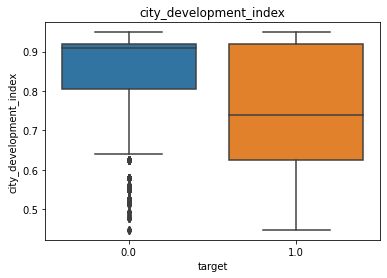

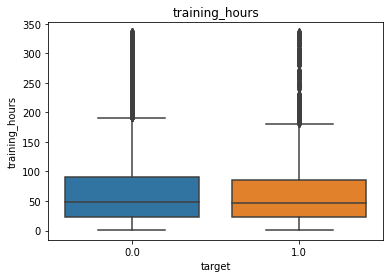

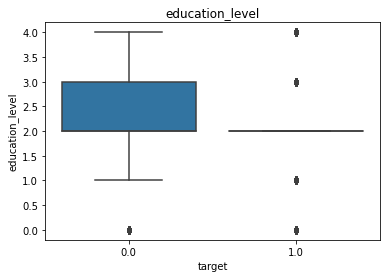

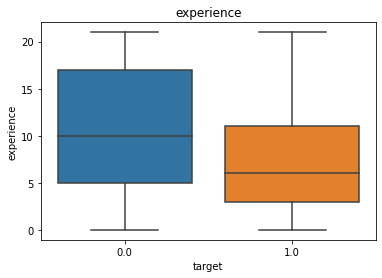

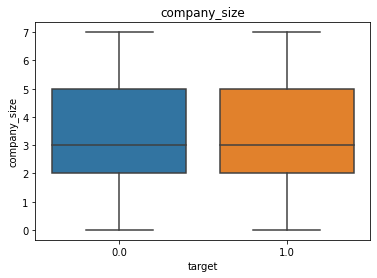

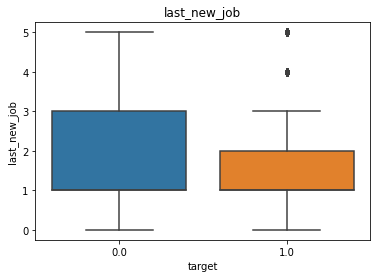

In [15]:
num_2=['city_development_index','training_hours','education_level','experience','company_size','last_new_job']
for i in num_2:
    num_compare(i)

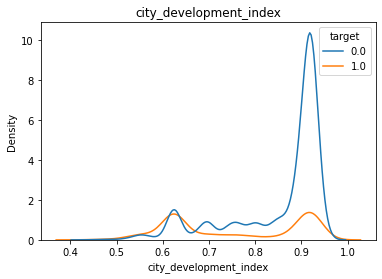

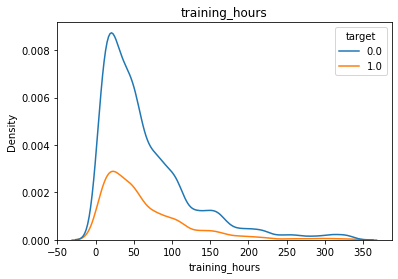

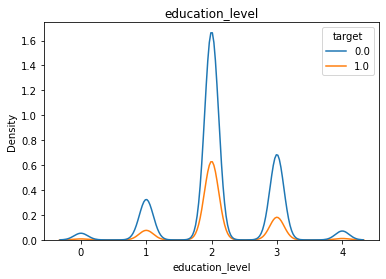

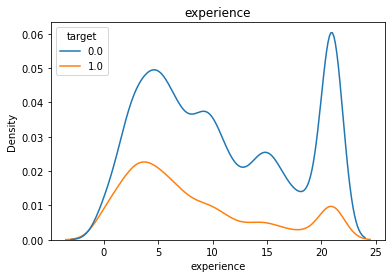

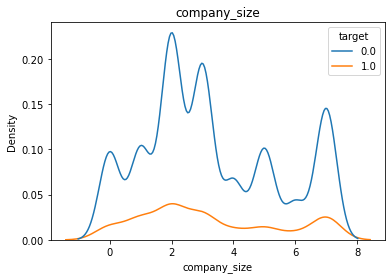

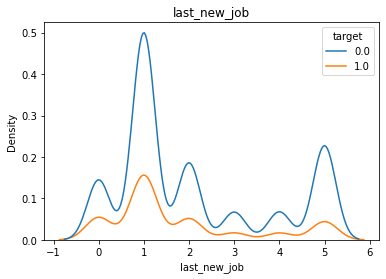

In [16]:
def num_compare2(num_col):
    sns.kdeplot(data=train_df,x=train_df[num_col],hue=train_df['target'])
    plt.title(num_col)
    plt.show()
for i in num_2:
    num_compare2(i)

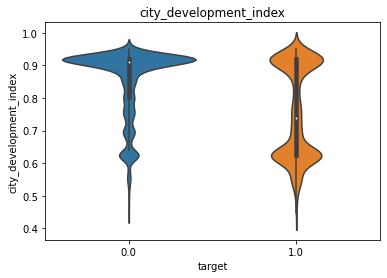

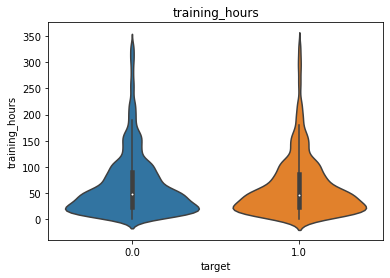

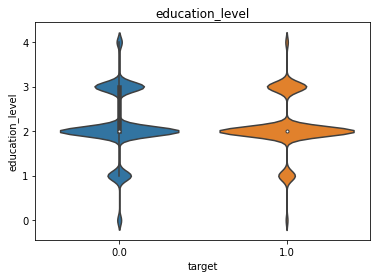

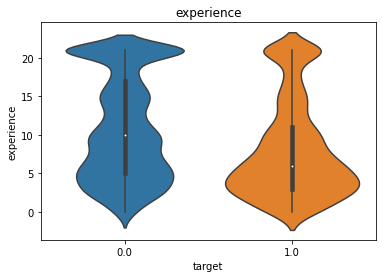

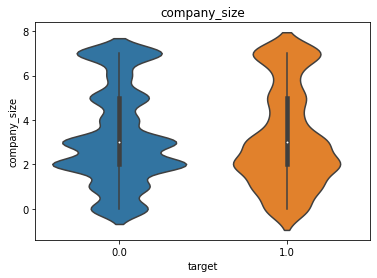

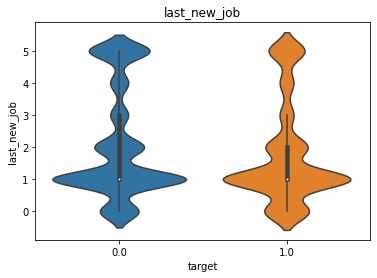

In [17]:
def num_compare3(num_col):
    sns.violinplot(data=train_df,y=train_df[num_col],x=train_df['target'])
    plt.title(num_col)
    plt.show()
for i in num_2:
    num_compare3(i)

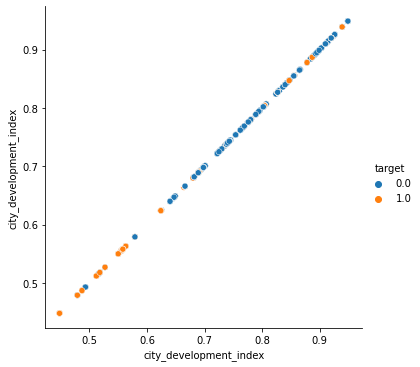

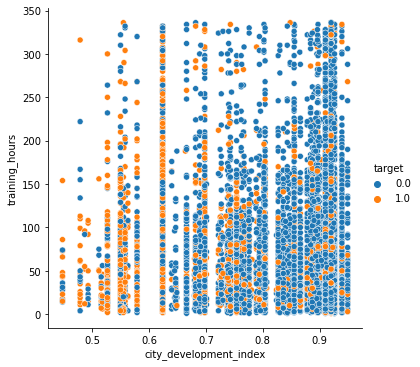

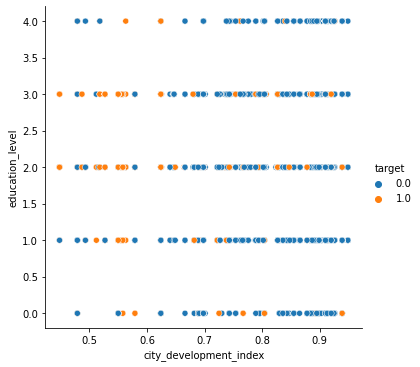

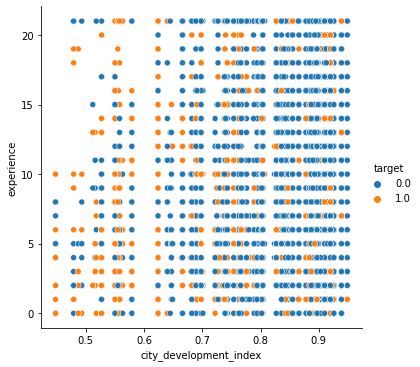

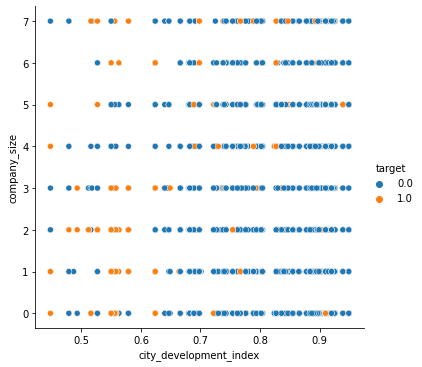

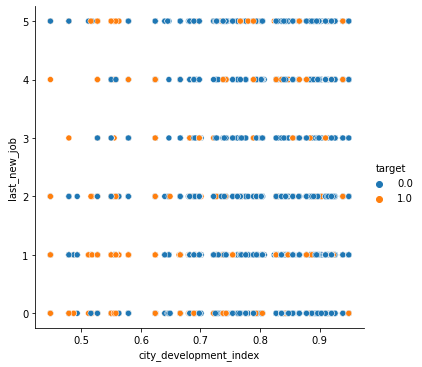

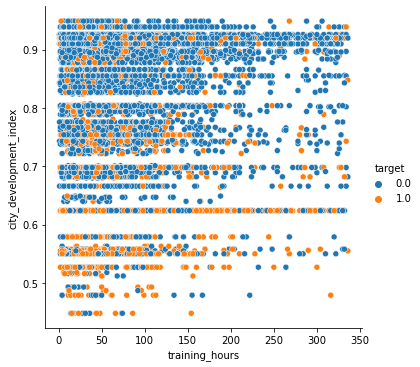

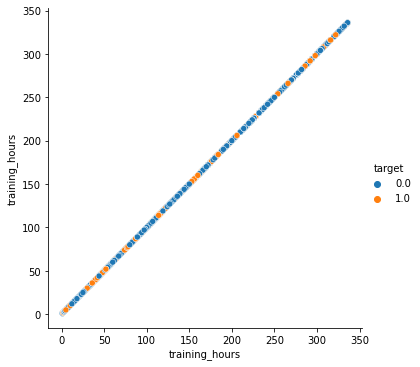

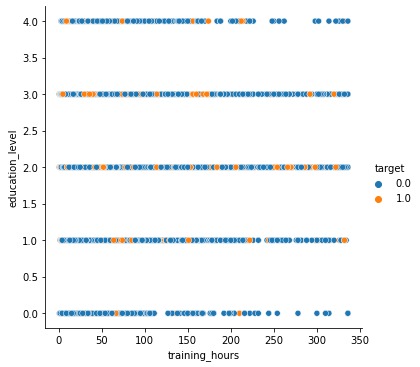

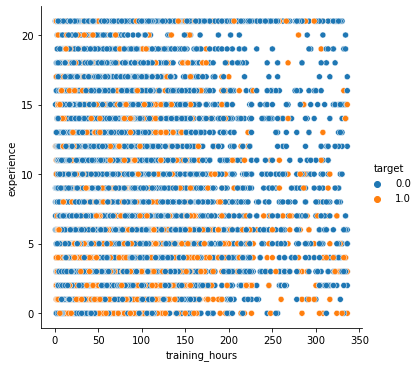

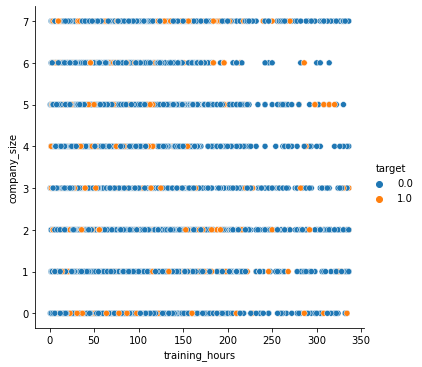

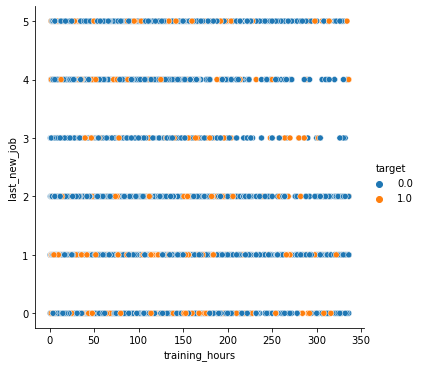

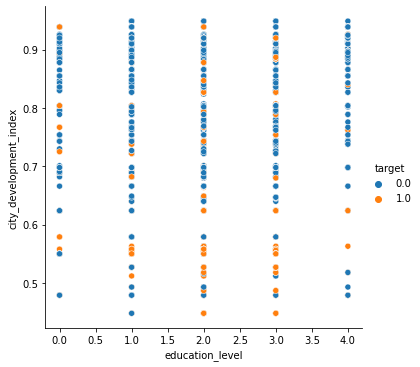

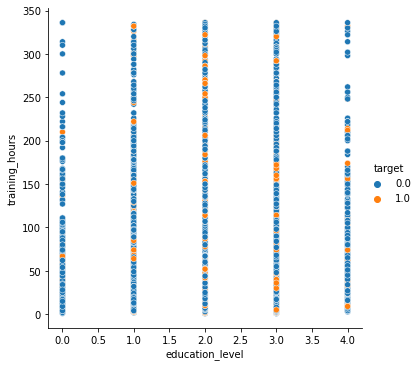

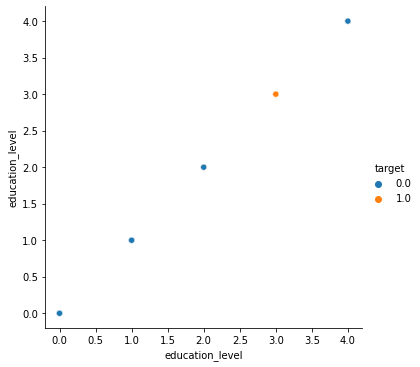

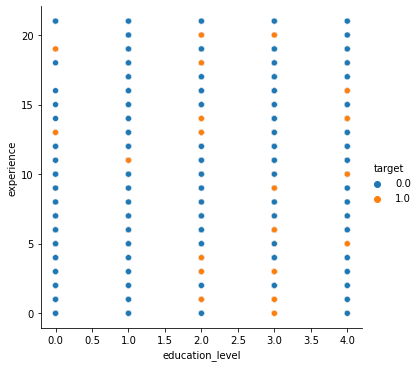

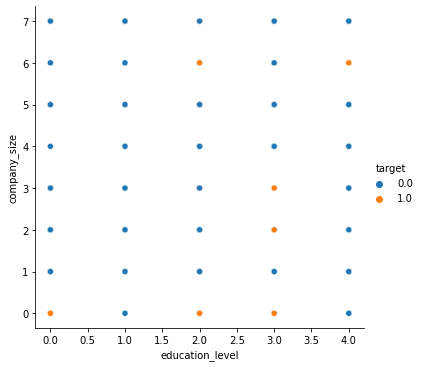

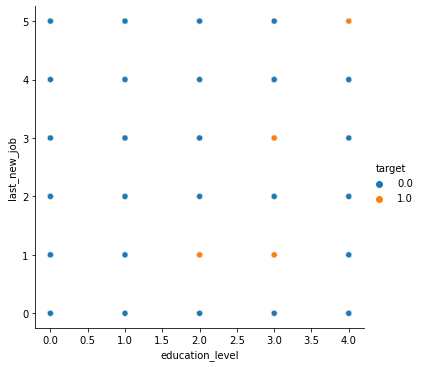

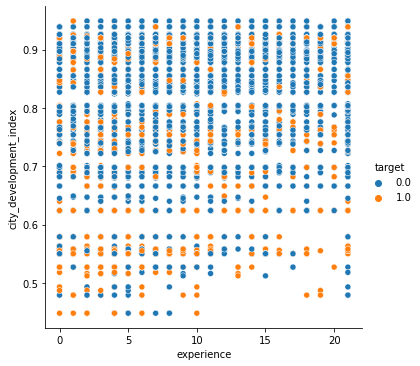

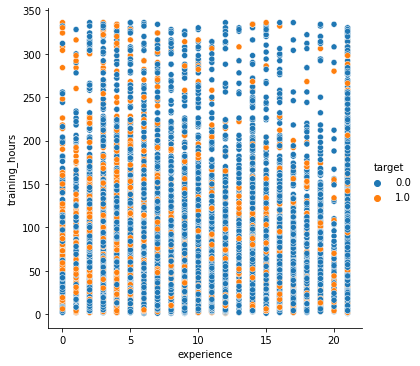

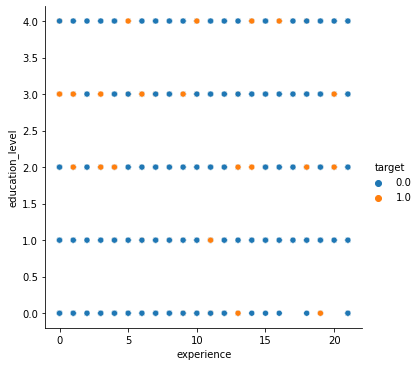

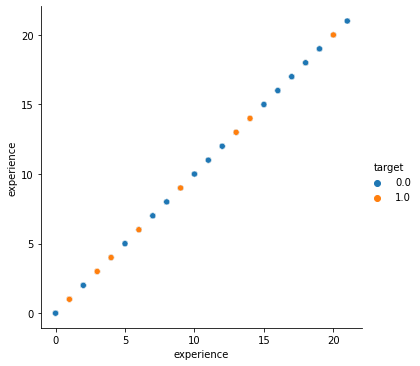

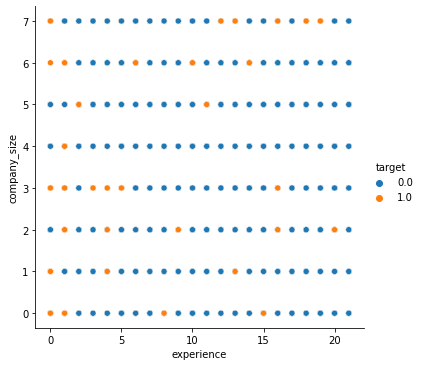

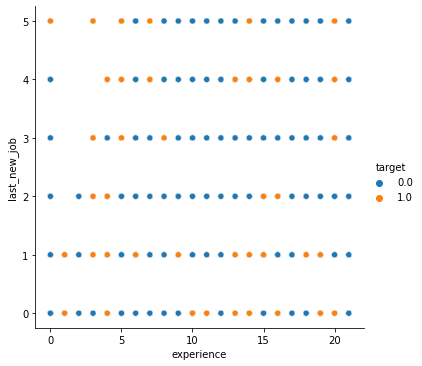

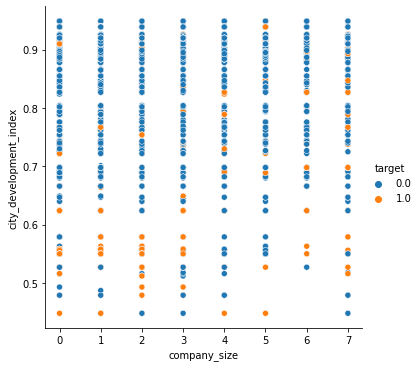

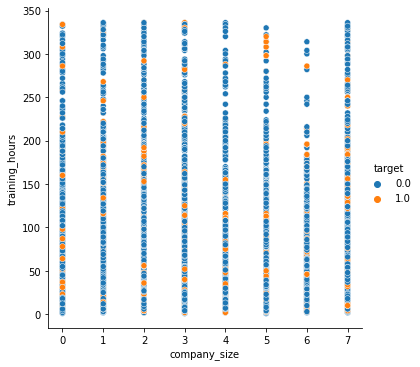

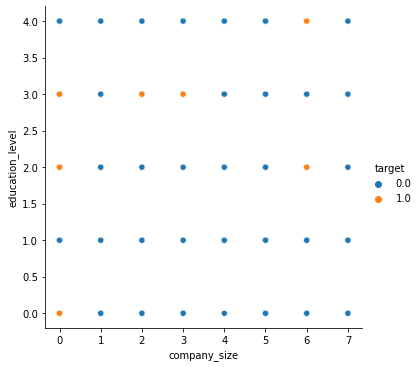

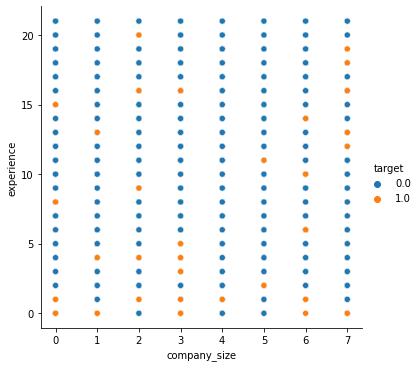

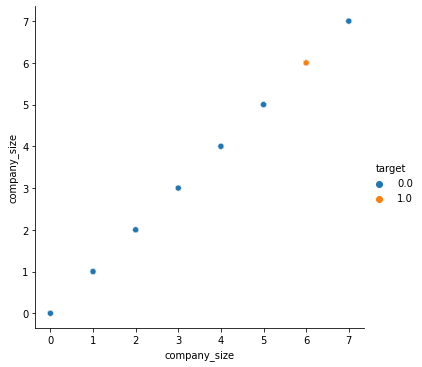

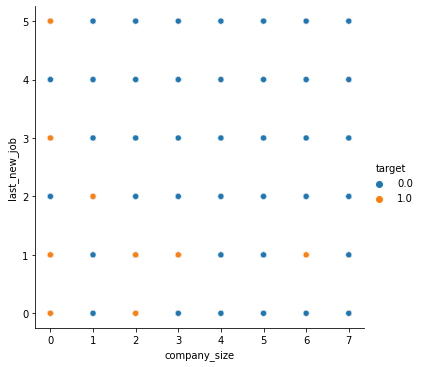

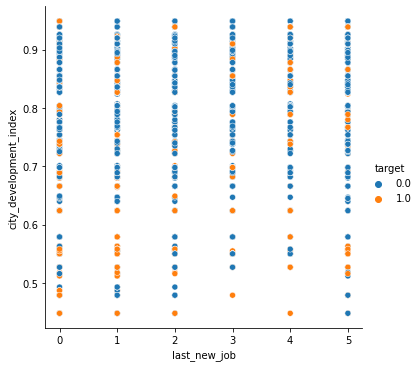

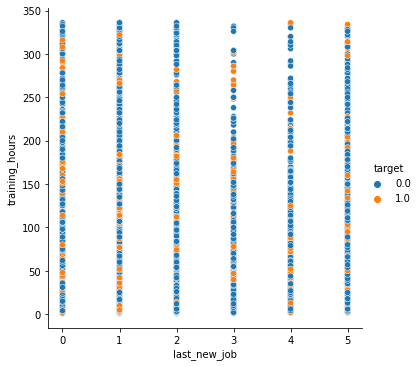

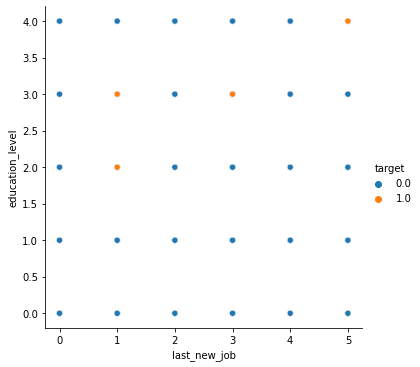

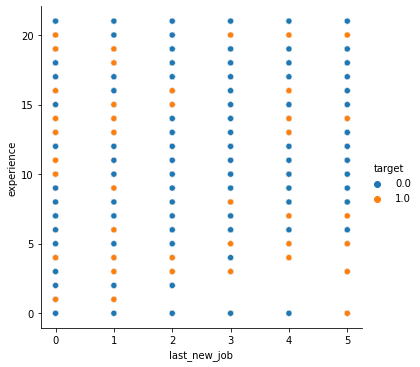

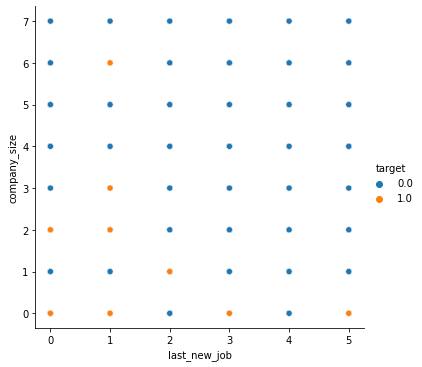

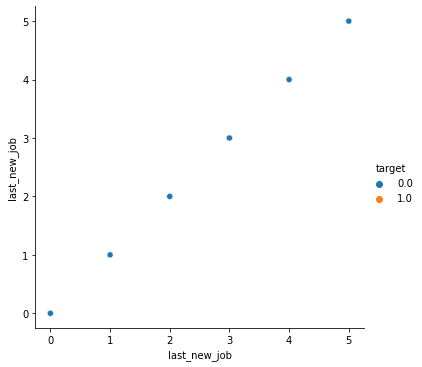

In [18]:
for i in num_2:
    for j in num_2:
        sns.relplot(data=train_df,x=i,y=j,hue='target')
        plt.show()

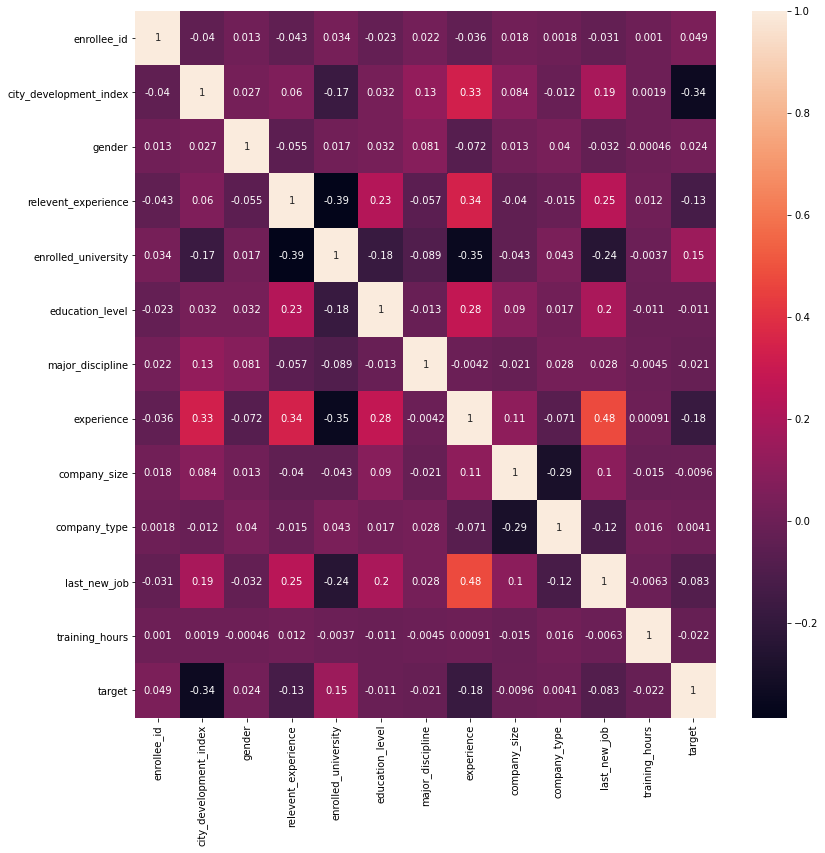

In [19]:
fig,ax=plt.subplots(figsize=(13,13))
sns.heatmap(train_df.corr(),annot=True,ax=ax)
plt.show()

In [20]:
print(train_df.isnull().sum()/19158)

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64


In [277]:
test_df['target'] = -1
test_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21,-1
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98,-1
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15,-1
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39,-1
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,-1
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,-1
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,-1
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,-1


In [278]:
data_df=pd.concat([train_df2,test_df],axis=0).reset_index(drop=True)
data_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21282,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,-1.0
21283,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,-1.0
21284,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,-1.0
21285,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,-1.0


In [279]:
from sklearn.preprocessing import LabelEncoder
data_df['gender']=data_df['gender'].map(gender_map)
data_df['education_level']=data_df['education_level'].map(education_level_map)
data_df['company_size']=data_df['company_size'].map(company_size_map)
data_df['last_new_job']=data_df['last_new_job'].map(last_new_job_map)
data_df['experience']=data_df['experience'].map(experience_map)
data_df['relevent_experience']=data_df['relevent_experience'].map(relevent_experience_map)
data_df['enrolled_university']=data_df['enrolled_university'].map(enrolled_university_map)
data_df['major_discipline']=data_df['major_discipline'].map(major_discipline_map)
data_df['company_type']=data_df['company_type'].map(company_type_map)
city_encoder=LabelEncoder()
data_df.loc[:,'city']=city_encoder.fit_transform(data_df.loc[:,'city'])
data_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,0.0,1,0.0,2.0,0.0,21.0,NaN,NaN,1.0,36,1.0
1,29725,77,0.776,0.0,0,0.0,2.0,0.0,15.0,2.0,0.0,5.0,47,0.0
2,11561,64,0.624,NaN,0,2.0,2.0,0.0,5.0,NaN,NaN,0.0,83,0.0
3,33241,14,0.789,NaN,0,NaN,2.0,4.0,0.0,NaN,0.0,0.0,52,1.0
4,666,50,0.767,0.0,1,0.0,3.0,0.0,21.0,2.0,4.0,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21282,1289,5,0.920,0.0,0,0.0,2.0,3.0,16.0,NaN,1.0,4.0,15,-1.0
21283,195,30,0.897,0.0,1,0.0,3.0,0.0,18.0,NaN,NaN,2.0,30,-1.0
21284,31762,2,0.887,0.0,0,0.0,0.0,NaN,3.0,NaN,0.0,0.0,18,-1.0
21285,7873,4,0.804,0.0,1,2.0,1.0,NaN,7.0,3.0,1.0,1.0,84,-1.0


In [280]:
train_dataset=data_df[data_df['target']!=-1].reset_index(drop=True)
test_dataset=data_df[data_df['target']==-1].reset_index(drop=True)
test_dataset=test_dataset.drop(['target'],axis=1)
train_dataset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,0.0,1,0.0,2.0,0.0,21.0,NaN,NaN,1.0,36,1.0
1,29725,77,0.776,0.0,0,0.0,2.0,0.0,15.0,2.0,0.0,5.0,47,0.0
2,11561,64,0.624,NaN,0,2.0,2.0,0.0,5.0,NaN,NaN,0.0,83,0.0
3,33241,14,0.789,NaN,0,NaN,2.0,4.0,0.0,NaN,0.0,0.0,52,1.0
4,666,50,0.767,0.0,1,0.0,3.0,0.0,21.0,2.0,4.0,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,55,0.878,0.0,0,0.0,2.0,3.0,14.0,NaN,NaN,1.0,42,1.0
19154,31398,5,0.920,0.0,1,0.0,2.0,0.0,14.0,NaN,NaN,4.0,52,1.0
19155,24576,5,0.920,0.0,1,0.0,2.0,0.0,21.0,2.0,0.0,4.0,44,0.0
19156,5756,94,0.802,0.0,1,0.0,1.0,NaN,0.0,4.0,0.0,2.0,97,0.0


In [281]:
test_dataset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,78,0.827,0.0,1,2.0,2.0,0.0,9.0,0.0,NaN,1.0,21
1,9858,5,0.920,1.0,1,0.0,2.0,0.0,5.0,NaN,0.0,1.0,98
2,31806,64,0.624,0.0,0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,15
3,27385,26,0.827,0.0,1,0.0,3.0,0.0,11.0,1.0,0.0,1.0,39
4,27724,5,0.920,0.0,1,0.0,2.0,0.0,21.0,7.0,0.0,5.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,5,0.920,0.0,0,0.0,2.0,3.0,16.0,NaN,1.0,4.0,15
2125,195,30,0.897,0.0,1,0.0,3.0,0.0,18.0,NaN,NaN,2.0,30
2126,31762,2,0.887,0.0,0,0.0,0.0,NaN,3.0,NaN,0.0,0.0,18
2127,7873,4,0.804,0.0,1,2.0,1.0,NaN,7.0,3.0,1.0,1.0,84


In [282]:
train_dataset['gender'].fillna(train_dataset['gender'].mode()[0],inplace=True)
train_dataset['major_discipline'].fillna(train_dataset['major_discipline'].mode()[0],inplace=True)
train_dataset['company_size'].fillna(value=-1,inplace=True)
train_dataset['company_type'].fillna(train_dataset['company_type'].mode()[0],inplace=True)
#train_dataset['enrolled_university'].fillna(train_dataset['enrolled_university'].mode()[0],inplace=True)
#train_dataset['education_level'].fillna(train_dataset['education_level'].mode()[0],inplace=True)
#train_dataset['experience'].fillna(train_dataset['experience'].mode()[0],inplace=True)
#train_dataset['last_new_job'].fillna(train_dataset['last_new_job'].mode()[0],inplace=True)
train_dataset.dropna(subset=['enrolled_university','education_level','experience','last_new_job'],axis=0,inplace=True)
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18014 non-null  int64  
 1   city                    18014 non-null  int32  
 2   city_development_index  18014 non-null  float64
 3   gender                  18014 non-null  float64
 4   relevent_experience     18014 non-null  int64  
 5   enrolled_university     18014 non-null  float64
 6   education_level         18014 non-null  float64
 7   major_discipline        18014 non-null  float64
 8   experience              18014 non-null  float64
 9   company_size            18014 non-null  float64
 10  company_type            18014 non-null  float64
 11  last_new_job            18014 non-null  float64
 12  training_hours          18014 non-null  int64  
 13  target                  18014 non-null  float64
dtypes: float64(10), int32(1), int64(3)
mem

In [283]:
train_dataset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,0.0,1,0.0,2.0,0.0,21.0,-1.0,0.0,1.0,36,1.0
1,29725,77,0.776,0.0,0,0.0,2.0,0.0,15.0,2.0,0.0,5.0,47,0.0
2,11561,64,0.624,0.0,0,2.0,2.0,0.0,5.0,-1.0,0.0,0.0,83,0.0
4,666,50,0.767,0.0,1,0.0,3.0,0.0,21.0,2.0,4.0,4.0,8,0.0
5,21651,57,0.764,0.0,1,1.0,2.0,0.0,11.0,-1.0,0.0,1.0,24,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,55,0.878,0.0,0,0.0,2.0,3.0,14.0,-1.0,0.0,1.0,42,1.0
19154,31398,5,0.920,0.0,1,0.0,2.0,0.0,14.0,-1.0,0.0,4.0,52,1.0
19155,24576,5,0.920,0.0,1,0.0,2.0,0.0,21.0,2.0,0.0,4.0,44,0.0
19156,5756,94,0.802,0.0,1,0.0,1.0,0.0,0.0,4.0,0.0,2.0,97,0.0


In [28]:
#from sklearn.impute import KNNImputer
#knn_imputer=KNNImputer(n_neighbors=3)
#x=np.round(knn_imputer.fit_transform(data_df))
#data_df=pd.DataFrame(x,columns=data_df.columns)

In [29]:
# Because I use tree based algorithm, so don't need to do one-hot encoding
#train_df=train_df.drop(['city'],axis=1)
#columns=train_df.select_dtypes(include=[object]).columns
#train_df=pd.concat([train_df,pd.get_dummies(train_df[columns])],axis=1)
#train_df=train_df.drop(['gender','relevent_experience','enrolled_university','major_discipline','company_type'],axis=1)
#train_df['new_target']=train_df['target']
#train_df=train_df.drop(['target'],axis=1)
#train_df

In [284]:
##To find out important features
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif,SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
##---------Anova--------------#
#x=train_dataset.iloc[:,1:13]
#y=train_dataset.iloc[:,13]
#feature=SelectPercentile(f_classif,percentile=70).fit(x,y)
#cols=feature.get_support(indices=True)
#new_feature=x.iloc[:,cols]
#new_feature.keys()
##------------------------#
## Here I use Random Forest 
x=train_dataset.iloc[:,1:13]
y=train_dataset.iloc[:,13]
x
## Just what I mentioned before. Because I use the tree based algorithm so don't need to do data standardization too.
#sd=StandardScaler().fit(x)
#x=sd.fit_transform(x)
#print(x.mean())
#print(x.std())

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,5,0.920,0.0,1,0.0,2.0,0.0,21.0,-1.0,0.0,1.0,36
1,77,0.776,0.0,0,0.0,2.0,0.0,15.0,2.0,0.0,5.0,47
2,64,0.624,0.0,0,2.0,2.0,0.0,5.0,-1.0,0.0,0.0,83
4,50,0.767,0.0,1,0.0,3.0,0.0,21.0,2.0,4.0,4.0,8
5,57,0.764,0.0,1,1.0,2.0,0.0,11.0,-1.0,0.0,1.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,55,0.878,0.0,0,0.0,2.0,3.0,14.0,-1.0,0.0,1.0,42
19154,5,0.920,0.0,1,0.0,2.0,0.0,14.0,-1.0,0.0,4.0,52
19155,5,0.920,0.0,1,0.0,2.0,0.0,21.0,2.0,0.0,4.0,44
19156,94,0.802,0.0,1,0.0,1.0,0.0,0.0,4.0,0.0,2.0,97


In [31]:
##Choice the best resampling method.
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN
from imblearn.pipeline import pipeline,make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

def resampling_choice(pipe):
    k=StratifiedKFold(n_splits=5,shuffle=True)
    score=cross_val_score(pipe,x,y,cv=k,scoring='roc_auc')
    print(score)
    print(score.mean())

over_pipe=make_pipeline(SMOTE(),RandomForestClassifier())
under_pipe=make_pipeline(TomekLinks(),RandomForestClassifier())
combine_pipe=make_pipeline(SMOTEENN(),RandomForestClassifier())

resampling_choice(over_pipe)
resampling_choice(under_pipe)
resampling_choice(combine_pipe)

[0.80397871 0.77807543 0.7631711  0.77423265 0.78326991]
0.7805455587085589
[0.78332751 0.78114521 0.78153213 0.79134097 0.79909619]
0.7872884027408116
[0.78995169 0.79664074 0.79759681 0.78664842 0.79460418]
0.7930883691511699


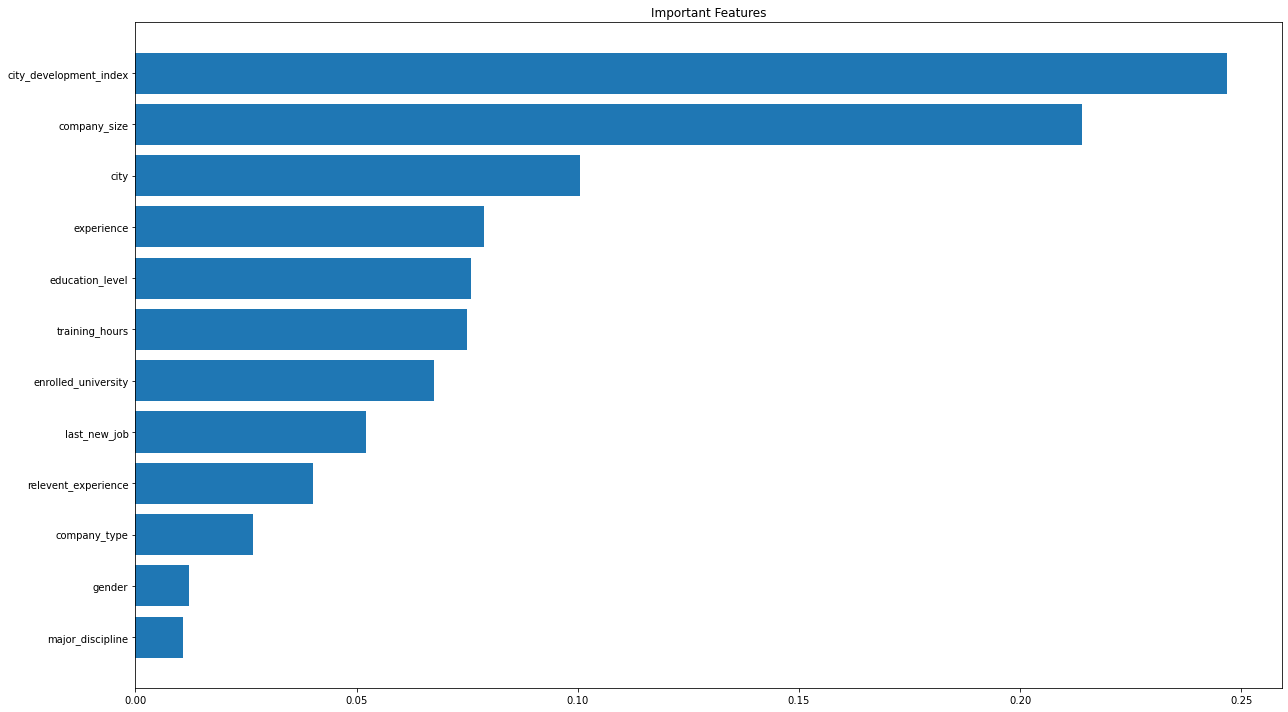

In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTEENN(random_state=111).fit_resample(xtrain,ytrain)
RFC=RandomForestClassifier(random_state=111)
RFC.fit(x_res,y_res)
importance=RFC.feature_importances_
indices=np.argsort(importance)
feature=train_dataset.drop(['target','enrollee_id'],axis=1).columns.tolist()
feat_imp=np.array(feature)[indices]
values=importance[indices]
y_ticks=np.arange(0,len(feature))
fig,ax=plt.subplots(figsize=(18,10))
ax.barh(y_ticks,values)
ax.set_yticklabels(feat_imp)
ax.set_yticks(y_ticks)
plt.title('Important Features')
fig.tight_layout()
plt.show()

## As we can see, city development index, company size, city, experience are the top 4 most important features.
## We can use this result to pick up some important features to build the model.
## Actually, more features can let the model more precise. So, I'm not going to do feature selection.
## If the data set has thousands of features or is very complex, based on the curse of dimensionality theory It should do the feature selection.

## Here is the way when I decide to go featrue selection.
#best_feature=feat_imp[-8:,]
#new_data=train_dataset[['enrollee_id'] + list(best_feature) + ['target']]
#new_data

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.model_selection import learning_curve
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb


def model_observe(resample,model,title):
    k=StratifiedKFold(n_splits=5,shuffle=True)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
    model_pipe=make_pipeline(resample,model)
    model_score=cross_val_score(model_pipe,x_train,y_train,cv=k,scoring='roc_auc')
    
    print('------------------')
    print(title)
    print(model_score)
    print(model_score.mean())
    
model_observe(SMOTE(),DecisionTreeClassifier(),'SMOTE + Tree')
model_observe(TomekLinks(),DecisionTreeClassifier(),'TomekLinks + Tree')
model_observe(SMOTEENN(),DecisionTreeClassifier(),'SMOTEENN + Tree')

model_observe(SMOTE(),RandomForestClassifier(),'SMOTE + Random Forest')
model_observe(TomekLinks(),RandomForestClassifier(),'TomekLinks + Random Forest')
model_observe(SMOTEENN(),RandomForestClassifier(),'SMOTEENN Random Forest')

model_observe(SMOTE(),BaggingClassifier(),'SMOTE + Bagging')
model_observe(TomekLinks(),BaggingClassifier(),'TomekLinks + Bagging')
model_observe(SMOTEENN(),BaggingClassifier(),'SMOTEENN + Bagging')

model_observe(SMOTE(),GradientBoostingClassifier(),'SMOTE + Gradient Boosting')
model_observe(TomekLinks(),GradientBoostingClassifier(),'TomekLinks + Gradient Boosting')
model_observe(SMOTEENN(),GradientBoostingClassifier(),'SMOTEENN + Gradient Boosting')

model_observe(SMOTE(),XGBClassifier(),'SMOTE + XGBoot')
model_observe(TomekLinks(),XGBClassifier(),'TomekLinks + XGBoot')
model_observe(SMOTEENN(),XGBClassifier(),'SMOTEENN + XGBoot')

lgbm_model=lgb.LGBMClassifier()
model_observe(SMOTE(random_state=111),lgbm_model,'SMOTE + LGBM')
model_observe(TomekLinks(),lgbm_model,'TomekLinks LGBM')
model_observe(SMOTEENN(random_state=111),lgbm_model,'SMOTEENN + LGBM')

------------------
SMOTE + Tree
[0.62747914 0.63875103 0.63684848 0.65169446 0.62772565]
0.6364997500643883
------------------
TomekLinks + Tree
[0.6613976  0.65302566 0.6357587  0.62375256 0.65314775]
0.6454164532761791
------------------
SMOTEENN + Tree
[0.71496388 0.69212958 0.70718056 0.7132461  0.71843809]
0.7091916398827933
------------------
SMOTE + Random Forest
[0.7795224  0.78268027 0.79570969 0.77804249 0.7909025 ]
0.7853714713834008
------------------
TomekLinks + Random Forest
[0.77949272 0.79192407 0.78596061 0.79860163 0.79237795]
0.7896713977410784
------------------
SMOTEENN Random Forest
[0.78726129 0.80167019 0.79344671 0.79983075 0.77355042]
0.7911518729549744
------------------
SMOTE + Bagging
[0.77094951 0.75389764 0.76133927 0.74210412 0.74943833]
0.7555457748875603
------------------
TomekLinks + Bagging
[0.76109655 0.77981417 0.76650055 0.76729766 0.77343885]
0.7696295571096778
------------------
SMOTEENN + Bagging
[0.78773999 0.78377979 0.78264512 0.77230519 0

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
------------------
SMOTE + XGBoot
[0.78034412 0.78740615 0.79016383 0.78897961 0.7994956 ]
0.7892778632394812


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
------------------
TomekLinks + XGBoot
[0.80127794 0.78010726 0.78037875 0.77815854 0.77916589]
0.7838176756530699


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
------------------
SMOTEENN + XGBoot
[0.78134519 0.77431914 0.78094756 0.79649409 0.78180669]
0.7829825335936427
------------------
SMOTE + LGBM
[0.77886393 0.80243681 0.79734541 0.80500643 0.80679142]
0.7980887989586491
------------------
TomekLinks LGBM
[0.80856696 0.77634282 0.79926787 0.80421949 0.8156696 ]
0.800813346340626
------------------
SMOTEENN + LGBM
[0.79415217 0.78322622 0.78944635 0.79543651 0.78998447]
0.7904491439641079


In [213]:
import time
from sklearn.metrics import roc_auc_score
accuracy={}
f1={}
recall={}
auc={}
speed={}

def model_training(x_res,y_res,model,title):
    #x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=111)
    #x_res,y_res=resample.fit_resample(x_train,y_train)
    start=time.time()
    model.fit(x_res,y_res)
    end=time.time()
    model_pred=model.predict(x_test)
    acc=accuracy_score(y_test,model_pred)
    accuracy[title]=acc
    train_score=model.score(x_res,y_res)
    f_s=f1_score(y_test,model_pred)
    f1[title]=f_s
    recall_res=recall_score(y_test,model_pred)
    recall[title]=recall_res
    y_pred=model.predict_proba(x_test)[:,1]
    auc_res=roc_auc_score(y_test,y_pred)
    auc[title]=auc_res
    total_time=end-start
    speed[title]=total_time
    cm=confusion_matrix(y_test,model_pred)
    sns.heatmap(cm,annot=True,fmt='.2f')
    plt.title(title)
    plt.show()
    
    print(classification_report(y_test,model_pred))
    print('Accuracy:%.2f'%(acc))
    print('Training score:%.2f'%(train_score))
    print('F1 score:%.2f'%(f_s))
    print('Recall:%.2f'%(recall_res))
    print('AUC:%.2f'%(auc_res))
    print('Times:%.2f'%(total_time))
    result_form=pd.DataFrame({
                         'Accuracy':accuracy,
                         'F1':f1,
                         'Recall':recall,
                         'AUC':auc,
                         'Speed(s)':speed})
    return result_form

In [214]:
###Learning curve(roc_auc)
from sklearn.model_selection import StratifiedKFold
def overfitting_check(model,title):
    k=StratifiedKFold(n_splits=5,shuffle=True)
    train_sizes,train_score,test_score=learning_curve(model,x,y,cv=k,scoring='roc_auc',n_jobs=-1,train_sizes=np.linspace(0.01,1.0,8))
    
    train_score_mean=np.mean(train_score,axis=1)
    train_score_std=np.std(train_score,axis=1)
    test_score_mean=np.mean(test_score,axis=1)
    test_score_std=np.std(test_score,axis=1)
    
    plt.fill_between(train_score_mean-train_score_std,train_score_mean+train_score_std,alpha=0.1,color='r')
    plt.fill_between(test_score_mean-test_score_std,test_score_mean+test_score_std,alpha=0.1,color='g')
    
    plt.plot(train_sizes,train_score_mean,'-o',color='r',label='Trainind score')
    plt.plot(train_sizes,test_score_mean,'-o',color='g',label='Cross_Validation score')
    
    plt.grid()
    #plt.ylim(0.1,1.0,0.1)
    plt.title(title)
    plt.legend()
    plt.show()

In [215]:
def overfitting_check_loss(model,title):
    k=StratifiedKFold(n_splits=5,shuffle=True)
    train_sizes,train_loss,test_loss=learning_curve(model,x,y,cv=k,scoring='neg_mean_squared_error',n_jobs=-1,train_sizes=np.linspace(0.01,1.0,8))
    
    train_loss_mean=-np.mean(train_loss,axis=1)
    test_loss_mean=-np.mean(test_loss,axis=1)
    
    plt.plot(train_sizes,train_loss_mean,'-o',color='r',label='Training')
    plt.plot(train_sizes,test_loss_mean,'-o',color='g',label='Cross_Validation')
    
    plt.grid()
    #plt.ylim(0.1,1.0,0.1)
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
# We can find the best parameters through hyperopt.
#from hyperopt import fmin,hp,STATUS_OK,tpe,Trials
#def rfc_best(params):
#    k=StratifiedKFold(n_splits=5,shuffle=True)
#    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
#    x_res,y_res=SMOTE(random_state=111).fit_resample(x_train,y_train)
#    clf=RandomForestClassifier(**params,random_state=111,n_jobs=-1)
#    score=cross_val_score(clf,x_res,y_res,cv=k,n_jobs=-1,scoring='roc_auc',error_score='raise').mean()
#    return {'loss':1-score,'status':STATUS_OK}


#space=hp.choice('classifier',[
#    {
#        'n_estimators':hp.choice('n_estimators',range(1,1000)),
#        'max_depth':hp.choice('max_depth',range(3,20)),
#        'min_samples_leaf':hp.choice('min_samples_leaf',range(1,100))
#    }])

#best=fmin(rfc_best,space,algo=tpe.suggest,max_evals=50)
#print('best:',best)

In [39]:
# In addition to Hyperopt, you can also use random search or GridSearch to find the best parameters.
# Here, I will conduct a random search because it is more convenient.
from scipy.stats import randint
from sklearn.model_selection import StratifiedKFold

k=StratifiedKFold(n_splits=10,shuffle=True)
rfc_params={
    'randomforestclassifier__n_estimators':randint(1,1000),
    'randomforestclassifier__max_depth':randint(3,20),
    'randomforestclassifier__min_samples_leaf':randint(1,100)
}
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
smote_rfc_pipe=make_pipeline(SMOTE(random_state=111),RandomForestClassifier(random_state=111))
rfc_smote_optimal=RandomizedSearchCV(smote_rfc_pipe,rfc_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
rfc_smote_optimal.fit(x_train,y_train)
print(rfc_smote_optimal.best_params_)
print(rfc_smote_optimal.best_score_)

{'randomforestclassifier__max_depth': 13, 'randomforestclassifier__min_samples_leaf': 70, 'randomforestclassifier__n_estimators': 672}
0.8007643117786296


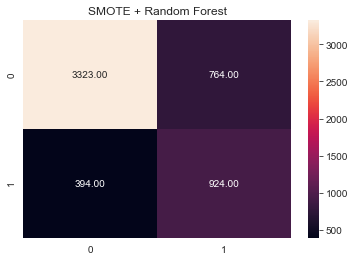

              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85      4087
         1.0       0.55      0.70      0.61      1318

    accuracy                           0.79      5405
   macro avg       0.72      0.76      0.73      5405
weighted avg       0.81      0.79      0.79      5405

Accuracy:0.79
Training score:0.83
F1 score:0.61
Recall:0.70
AUC:0.80
Times:7.15


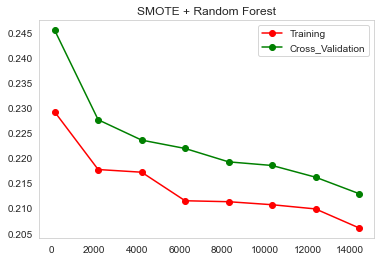

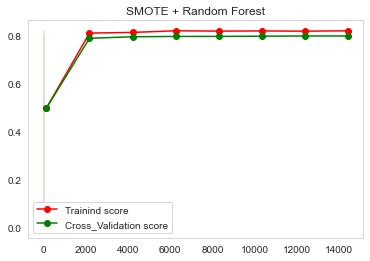

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.785754,0.61477,0.701062,0.799961,7.153437


In [216]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTE(random_state=111).fit_resample(x_train,y_train)
rfc=RandomForestClassifier(n_estimators=672,max_depth=13,min_samples_leaf=80,random_state=111)
title='SMOTE + Random Forest'
form=model_training(x_res,y_res,rfc,title)
overfitting_check_loss(rfc,title)
overfitting_check(rfc,title)
form

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
rfc_tomeklinks_pipe=make_pipeline(TomekLinks(),RandomForestClassifier(random_state=111))
rfc_tomeklinks_optimal=RandomizedSearchCV(rfc_tomeklinks_pipe,rfc_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
rfc_tomeklinks_optimal.fit(x_train,y_train)
print(rfc_tomeklinks_optimal.best_params_)
print(rfc_tomeklinks_optimal.best_score_)

{'randomforestclassifier__max_depth': 15, 'randomforestclassifier__min_samples_leaf': 21, 'randomforestclassifier__n_estimators': 423}
0.8022136294723905


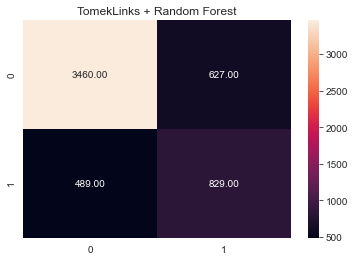

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      4087
         1.0       0.57      0.63      0.60      1318

    accuracy                           0.79      5405
   macro avg       0.72      0.74      0.73      5405
weighted avg       0.80      0.79      0.80      5405

Accuracy:0.79
Training score:0.83
F1 score:0.60
Recall:0.63
AUC:0.80
Times:2.80


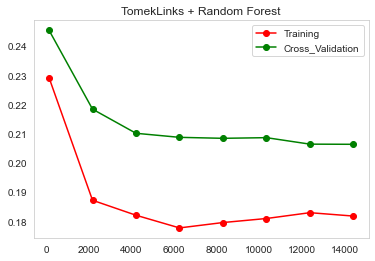

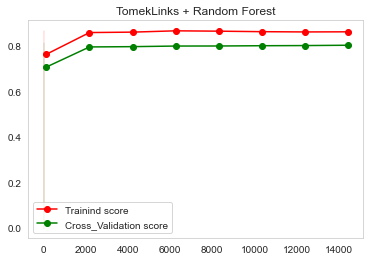

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.785754,0.614770,0.701062,0.799961,7.153437
TomekLinks + Random Forest,0.793525,0.597693,0.628983,0.799828,2.804947


In [217]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=TomekLinks().fit_resample(x_train,y_train)
rfc=RandomForestClassifier(n_estimators=423,max_depth=15,min_samples_leaf=21,random_state=111)
title='TomekLinks + Random Forest'
form=model_training(x_res,y_res,rfc,title)
overfitting_check_loss(rfc,title)
overfitting_check(rfc,title)
form

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
rfc_smoteenn_pipe=make_pipeline(SMOTEENN(random_state=111),RandomForestClassifier(random_state=111))
rfc_smoteenn_optimal=RandomizedSearchCV(rfc_smoteenn_pipe,rfc_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
rfc_smoteenn_optimal.fit(x_train,y_train)
print(rfc_smoteenn_optimal.best_params_)
print(rfc_smoteenn_optimal.best_score_)

{'randomforestclassifier__max_depth': 18, 'randomforestclassifier__min_samples_leaf': 9, 'randomforestclassifier__n_estimators': 489}
0.7972614407979773


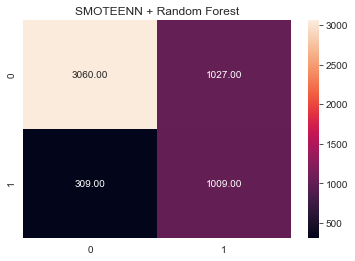

              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82      4087
         1.0       0.50      0.77      0.60      1318

    accuracy                           0.75      5405
   macro avg       0.70      0.76      0.71      5405
weighted avg       0.81      0.75      0.77      5405

Accuracy:0.75
Training score:0.92
F1 score:0.60
Recall:0.77
AUC:0.80
Times:3.56


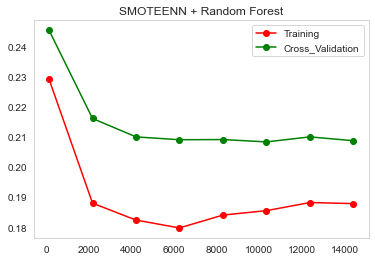

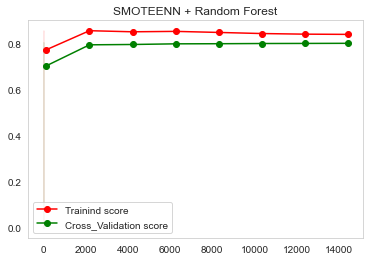

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.785754,0.614770,0.701062,0.799961,7.153437
TomekLinks + Random Forest,0.793525,0.597693,0.628983,0.799828,2.804947
SMOTEENN + Random Forest,0.752821,0.601670,0.765554,0.795784,3.556024


In [218]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTEENN(random_state=111).fit_resample(x_train,y_train)
rfc=RandomForestClassifier(n_estimators=489,max_depth=9,min_samples_leaf=20,random_state=111)
title='SMOTEENN + Random Forest'
form=model_training(x_res,y_res,rfc,title)
overfitting_check_loss(rfc,title)
overfitting_check(rfc,title)
form

In [ ]:
#def bagging_smoteenn(params):
#    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
#    x_res,y_res=SMOTEENN(random_state=111).fit_resample(x_train,y_train)
#    clf=BaggingClassifier(**params,random_state=111)
#    acc=cross_val_score(clf,x_res,y_res,n_jobs=-1).mean()
#    return {'loss':-acc,'status':STATUS_OK}

#bagg_space=hp.choice('classifier',[
#    {
#        'n_estimators':hp.choice('n_estimators',range(1,1000)),
#        'bootstrap':hp.choice('bootstrap',[True,False]),
#        'bootstrap_features':hp.choice('bootstrap_features',[True,False]),
#        'max_features':hp.uniform('max_features',0.5,1.0),
#        'max_samples':hp.uniform('max_samples',0.5,1.0)
#    }
#])

#bagg_best=fmin(bagging_smoteenn,bagg_space,algo=tpe.suggest,max_evals=50)
#print('best',bagg_best)

In [66]:
bagg_params={
    'baggingclassifier__n_estimators':randint(1,1000),
    'baggingclassifier__bootstrap':[True,False],
    'baggingclassifier__bootstrap_features':[True,False],
    'baggingclassifier__max_features':[0.5,0.6,0.7,0.8,0.9,1.0],
    'baggingclassifier__max_samples':[0.5,0.6,0.7,0.8,0.9,1.0],
    'baggingclassifier__random_state':[111]
}

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
bagg_smote_pipe=make_pipeline(SMOTE(random_state=111),BaggingClassifier())
bagg_smote_optimal=RandomizedSearchCV(bagg_smote_pipe,bagg_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
bagg_smote_optimal.fit(x_train,y_train)
print(bagg_smote_optimal.best_params_)
print(bagg_smote_optimal.best_score_)

{'baggingclassifier__bootstrap': True, 'baggingclassifier__bootstrap_features': False, 'baggingclassifier__max_features': 0.8, 'baggingclassifier__max_samples': 0.6, 'baggingclassifier__n_estimators': 938, 'baggingclassifier__random_state': 111}
0.7943688749713129


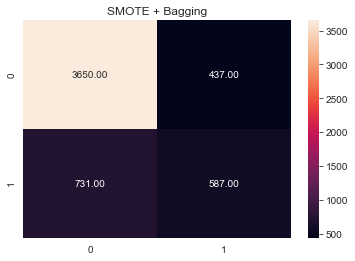

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      4087
         1.0       0.57      0.45      0.50      1318

    accuracy                           0.78      5405
   macro avg       0.70      0.67      0.68      5405
weighted avg       0.77      0.78      0.77      5405

Accuracy:0.78
Training score:0.95
F1 score:0.50
Recall:0.45
AUC:0.79
Times:1.78


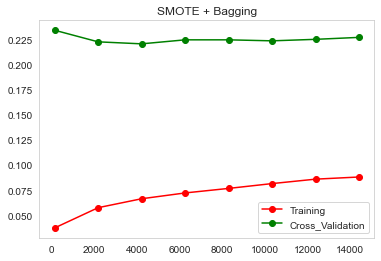

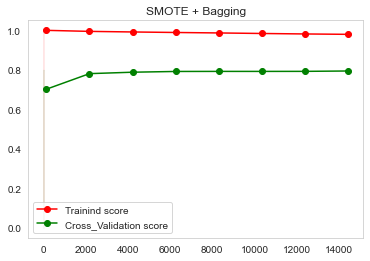

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.785754,0.614770,0.701062,0.799961,7.153437
TomekLinks + Random Forest,0.793525,0.597693,0.628983,0.799828,2.804947
SMOTEENN + Random Forest,0.752821,0.601670,0.765554,0.795784,3.556024
SMOTE + Bagging,0.783904,0.501281,0.445372,0.792113,1.780701


In [219]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTE(random_state=111).fit_resample(x_train,y_train)
model=BaggingClassifier(n_estimators=100,bootstrap=True,bootstrap_features=False,max_features=0.5,max_samples=0.6,random_state=111)
title='SMOTE + Bagging'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
bagg_tomeklink_pipe=make_pipeline(TomekLinks(),BaggingClassifier())
bagg_tomeklink_optimal=RandomizedSearchCV(bagg_tomeklink_pipe,bagg_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
bagg_tomeklink_optimal.fit(x_train,y_train)
print(bagg_tomeklink_optimal.best_params_)
print(bagg_tomeklink_optimal.best_score_)

{'baggingclassifier__bootstrap': True, 'baggingclassifier__bootstrap_features': False, 'baggingclassifier__max_features': 0.8, 'baggingclassifier__max_samples': 0.5, 'baggingclassifier__n_estimators': 544, 'baggingclassifier__random_state': 111}
0.7979628297171231


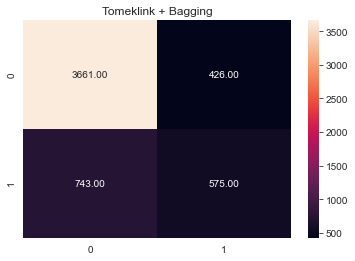

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      4087
         1.0       0.57      0.44      0.50      1318

    accuracy                           0.78      5405
   macro avg       0.70      0.67      0.68      5405
weighted avg       0.77      0.78      0.77      5405

Accuracy:0.78
Training score:0.92
F1 score:0.50
Recall:0.44
AUC:0.80
Times:5.38


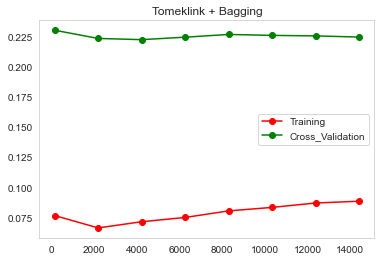

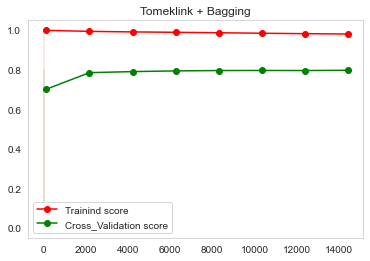

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.785754,0.614770,0.701062,0.799961,7.153437
TomekLinks + Random Forest,0.793525,0.597693,0.628983,0.799828,2.804947
SMOTEENN + Random Forest,0.752821,0.601670,0.765554,0.795784,3.556024
SMOTE + Bagging,0.783904,0.501281,0.445372,0.792113,1.780701
Tomeklink + Bagging,0.783719,0.495903,0.436267,0.796361,5.382188


In [220]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=TomekLinks().fit_resample(x_train,y_train)
model=BaggingClassifier(n_estimators=544,bootstrap=True,bootstrap_features=False,max_features=0.5,max_samples=0.5,random_state=111)
title='Tomeklink + Bagging'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
bagg_smoteenn_pipe=make_pipeline(SMOTEENN(random_state=111),BaggingClassifier())
bagg_optimal=RandomizedSearchCV(bagg_smoteenn_pipe,bagg_params,n_iter=10,cv=k,n_jobs=-1,scoring='roc_auc')
bagg_optimal.fit(x_train,y_train)
print(bagg_optimal.best_params_)
print(bagg_optimal.best_score_)

{'baggingclassifier__bootstrap': True, 'baggingclassifier__bootstrap_features': True, 'baggingclassifier__max_features': 0.8, 'baggingclassifier__max_samples': 0.5, 'baggingclassifier__n_estimators': 570, 'baggingclassifier__random_state': 111}
0.7921721758785539


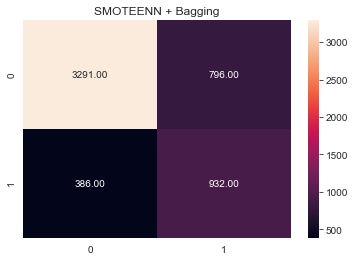

              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85      4087
         1.0       0.54      0.71      0.61      1318

    accuracy                           0.78      5405
   macro avg       0.72      0.76      0.73      5405
weighted avg       0.81      0.78      0.79      5405

Accuracy:0.78
Training score:0.99
F1 score:0.61
Recall:0.71
AUC:0.80
Times:12.97


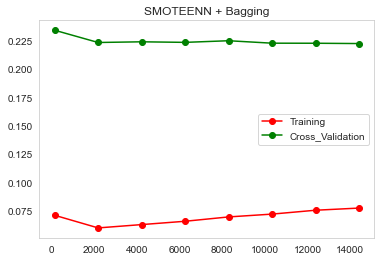

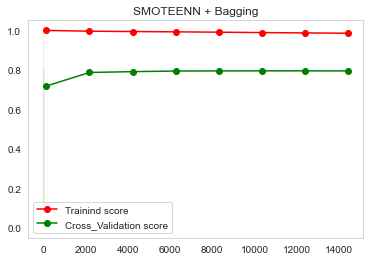

In [221]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTEENN(random_state=111).fit_resample(x_train,y_train)
model=BaggingClassifier(n_estimators=570,bootstrap=True,bootstrap_features=True,max_features=0.8,max_samples=0.5,random_state=111)
title='SMOTEENN + Bagging'
model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)

In [ ]:
#def smote_grad(params):
#    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
#    x_res,y_res=SMOTE(random_state=111).fit_resample(x_train,y_train)
#    clf=GradientBoostingClassifier(**params,random_state=111)
#    acc=cross_val_score(clf,x_res,y_res,n_jobs=-1).mean()
#    return {'loss':-acc,'status':STATUS_OK}

#grad_smote_space=hp.choice('classifier',[
#    {
#        'n_estimators':hp.choice('n_estimators',range(100,1000)),
#        'max_depth':hp.choice('max_depth',range(3,20)),
#        'max_features':hp.uniform('max_feature',0.5,1.0),
#        'subsample':hp.uniform('subsample',0.5,1.0),
#        'learning_rate':hp.loguniform('learning_rate',np.log(0.01),np.log(1.0))
#    }
#])
#smote_grad_best=fmin(smote_grad,grad_smote_space,algo=tpe.suggest,max_evals=50)
#print('best:',smote_grad_best)

In [79]:
grad_params={
    'gradientboostingclassifier__n_estimators':randint(100,1000),
    'gradientboostingclassifier__max_depth':randint(3,20),
    'gradientboostingclassifier__max_features':[0.5,0.6,0.7,0.8,0.9,1],
    'gradientboostingclassifier__subsample':[0.5,0.6,0.7,0.8,0.9,1],
    'gradientboostingclassifier__learning_rate':[0.01,0.03,0.05,0.07,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
grad_smote_pipe=make_pipeline(SMOTE(random_state=111),GradientBoostingClassifier())
grad_smote_optimal=RandomizedSearchCV(grad_smote_pipe,grad_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
grad_smote_optimal.fit(x_train,y_train)
print(grad_smote_optimal.best_params_)
print(grad_smote_optimal.best_score_)

{'gradientboostingclassifier__learning_rate': 0.01, 'gradientboostingclassifier__max_depth': 6, 'gradientboostingclassifier__max_features': 1, 'gradientboostingclassifier__n_estimators': 459, 'gradientboostingclassifier__subsample': 0.8}
0.797272315388023


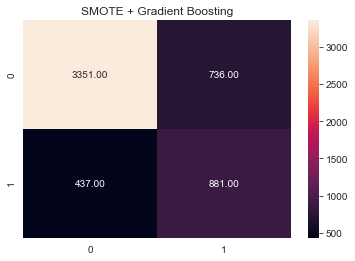

              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      4087
         1.0       0.54      0.67      0.60      1318

    accuracy                           0.78      5405
   macro avg       0.71      0.74      0.73      5405
weighted avg       0.80      0.78      0.79      5405

Accuracy:0.78
Training score:0.85
F1 score:0.60
Recall:0.67
AUC:0.80
Times:4.67


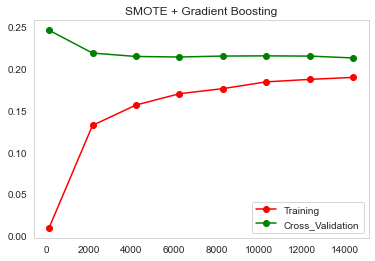

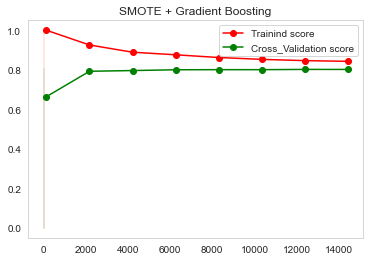

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.785754,0.614770,0.701062,0.799961,7.153437
TomekLinks + Random Forest,0.793525,0.597693,0.628983,0.799828,2.804947
SMOTEENN + Random Forest,0.752821,0.601670,0.765554,0.795784,3.556024
SMOTE + Bagging,0.783904,0.501281,0.445372,0.792113,1.780701
Tomeklink + Bagging,0.783719,0.495903,0.436267,0.796361,5.382188
SMOTEENN + Bagging,0.781314,0.611950,0.707132,0.795284,12.966343
SMOTE + Gradient Boosting,0.782979,0.600341,0.668437,0.797842,4.671258
Tomeklink + Gradient Boosting,0.797040,0.606104,0.640364,0.801555,6.656105
SMOTEENN + Gradient Boosting,0.766883,0.609907,0.747344,0.796831,9.039454
SMOTE + XGBoot,0.776873,0.605625,0.702580,0.797079,2.378335


In [232]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTE(random_state=111).fit_resample(x_train,y_train)
model=GradientBoostingClassifier(n_estimators=459,max_depth=6,max_features=1,subsample=0.8,learning_rate=0.01,random_state=111)
title='SMOTE + Gradient Boosting'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

In [ ]:
#def smote_grad(params):
#    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
#    x_res,y_res=SMOTE(random_state=111).fit_resample(x_train,y_train)
#    clf=GradientBoostingClassifier(**params,random_state=111)
##    acc=cross_val_score(clf,x_res,y_res,n_jobs=-1).mean()
#    return {'loss':-acc,'status':STATUS_OK}

#grad_smote_space=hp.choice('classifier',[
#    {
#        'n_estimators':hp.choice('n_estimators',range(100,1000)),
#        'max_depth':hp.choice('max_depth',range(3,20)),
#        'max_features':hp.uniform('max_feature',0.5,1.0),
#        'subsample':hp.uniform('subsample',0.5,1.0),
#        'learning_rate':hp.loguniform('learning_rate',np.log(0.01),np.log(1.0))
#    }
#])
##smote_grad_best=fmin(smote_grad,grad_smote_space,algo=tpe.suggest,max_evals=50)
#print('best:',smote_grad_best)

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
grad_tomeklinks_pipe=make_pipeline(TomekLinks(),GradientBoostingClassifier())
grad_tomeklinks_optimal=RandomizedSearchCV(grad_tomeklinks_pipe,grad_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
grad_tomeklinks_optimal.fit(x_train,y_train)
print(grad_tomeklinks_optimal.best_params_)
print(grad_tomeklinks_optimal.best_score_)

{'gradientboostingclassifier__learning_rate': 0.01, 'gradientboostingclassifier__max_depth': 6, 'gradientboostingclassifier__max_features': 0.6, 'gradientboostingclassifier__n_estimators': 697, 'gradientboostingclassifier__subsample': 0.7}
0.8011150514184786


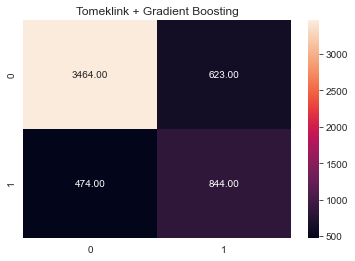

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      4087
         1.0       0.58      0.64      0.61      1318

    accuracy                           0.80      5405
   macro avg       0.73      0.74      0.73      5405
weighted avg       0.81      0.80      0.80      5405

Accuracy:0.80
Training score:0.83
F1 score:0.61
Recall:0.64
AUC:0.80
Times:6.66


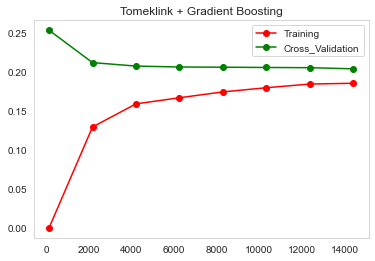

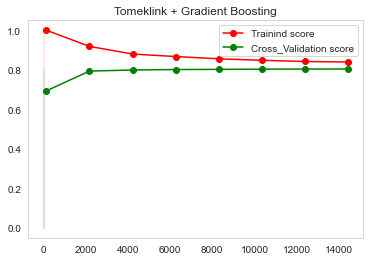

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.785754,0.614770,0.701062,0.799961,7.153437
TomekLinks + Random Forest,0.793525,0.597693,0.628983,0.799828,2.804947
SMOTEENN + Random Forest,0.752821,0.601670,0.765554,0.795784,3.556024
SMOTE + Bagging,0.783904,0.501281,0.445372,0.792113,1.780701
Tomeklink + Bagging,0.783719,0.495903,0.436267,0.796361,5.382188
SMOTEENN + Bagging,0.781314,0.611950,0.707132,0.795284,12.966343
SMOTE + Gradient Boosting,0.782979,0.600341,0.668437,0.797842,4.689654
Tomeklink + Gradient Boosting,0.797040,0.606104,0.640364,0.801555,6.656105


In [223]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=TomekLinks().fit_resample(x_train,y_train)
model=GradientBoostingClassifier(n_estimators=697,max_depth=4,max_features=0.9,subsample=0.8,learning_rate=0.01,random_state=111)
title='Tomeklink + Gradient Boosting'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
grad_smoteenn_pipe=make_pipeline(SMOTEENN(random_state=111),GradientBoostingClassifier())
grad_smoteenn_optimal=RandomizedSearchCV(grad_smoteenn_pipe,grad_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
grad_smoteenn_optimal.fit(x_train,y_train)
print(grad_smoteenn_optimal.best_params_)
print(grad_smoteenn_optimal.best_score_)

{'gradientboostingclassifier__learning_rate': 0.3, 'gradientboostingclassifier__max_depth': 19, 'gradientboostingclassifier__max_features': 0.7, 'gradientboostingclassifier__n_estimators': 684, 'gradientboostingclassifier__subsample': 0.9}
0.7898540974008007


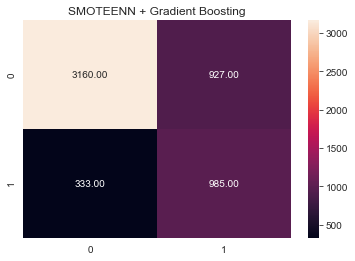

              precision    recall  f1-score   support

         0.0       0.90      0.77      0.83      4087
         1.0       0.52      0.75      0.61      1318

    accuracy                           0.77      5405
   macro avg       0.71      0.76      0.72      5405
weighted avg       0.81      0.77      0.78      5405

Accuracy:0.77
Training score:0.94
F1 score:0.61
Recall:0.75
AUC:0.80
Times:9.04


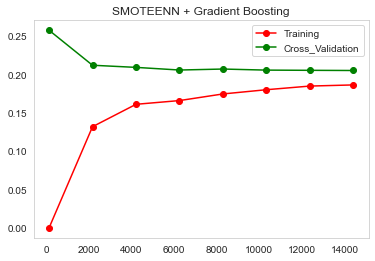

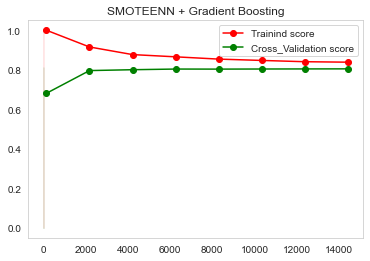

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.785754,0.614770,0.701062,0.799961,7.153437
TomekLinks + Random Forest,0.793525,0.597693,0.628983,0.799828,2.804947
SMOTEENN + Random Forest,0.752821,0.601670,0.765554,0.795784,3.556024
SMOTE + Bagging,0.783904,0.501281,0.445372,0.792113,1.780701
Tomeklink + Bagging,0.783719,0.495903,0.436267,0.796361,5.382188
SMOTEENN + Bagging,0.781314,0.611950,0.707132,0.795284,12.966343
SMOTE + Gradient Boosting,0.782979,0.600341,0.668437,0.797842,4.689654
Tomeklink + Gradient Boosting,0.797040,0.606104,0.640364,0.801555,6.656105
SMOTEENN + Gradient Boosting,0.766883,0.609907,0.747344,0.796831,9.039454


In [224]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
grad=GradientBoostingClassifier(n_estimators=684,max_depth=4,max_features=0.9,subsample=0.9,learning_rate=0.01,random_state=111)
x_res,y_res=SMOTEENN(random_state=111).fit_resample(x_train,y_train)
title='SMOTEENN + Gradient Boosting'
form=model_training(x_res,y_res,grad,title)
overfitting_check_loss(grad,title)
overfitting_check(grad,title)
form

In [ ]:
#def grad_smteenn(params):
#    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
#    x_res,y_res=SMOTEENN(random_state=111).fit_resample(x_train,y_train)
#    grad=GradientBoostingClassifier(**params,random_state=111)
#    acc=cross_val_score(grad,x_res,y_res,n_jobs=-1,error_score='raise').mean()
#    return {'loss':-acc,'status':STATUS_OK}

#grad_smoteenn_space=hp.choice('classifier',[
#    {
#        'n_estimators':hp.choice('n_estimators',range(100,1000)),
#        'max_depth':hp.choice('max_depth',range(3,20)),
#        'max_features':hp.uniform('max_feature',0.5,1.0),
#        'subsample':hp.uniform('subsample',0.5,1.0),
#        'learning_rate':hp.loguniform('learning_rate',np.log(0.01),np.log(1.0))
#    }
#])

##grad_smoteenn_best=fmin(grad_smteenn,grad_smoteenn_space,algo=tpe.suggest,max_evals=50)
#print('best:',grad_smoteenn_best)

In [124]:
xgb_params={
    'xgbclassifier__n_estimators':randint(100,1000),
    'xgbclassifier__subsample':[0.5,0.6,0.7,0.8,0.9,1],
    'xgbclassifier__colsample_bytree':[0.5,0.6,0.7,0.8,0.9,1],
    'xgbclassifier__learning_rate':[0.01,0.03,0.05,0.07,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'xgbclassifier__gamma':[0.1,0.3,0.5,0.7,0.9,1,2,3,4,5,6,7,8,9,10],
    'xgbclassifier__random_state':[111],
    'xgbclassifier__max_depth':randint(3,20),
    'xgbclassifier__random_state':[111]
}
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
xgb_smote_pipe=make_pipeline(SMOTE(random_state=111),XGBClassifier())
xgb_smote_optimal=RandomizedSearchCV(xgb_smote_pipe,xgb_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
xgb_smote_optimal.fit(x_train,y_train)
print(xgb_smote_optimal.best_params_)
print(xgb_smote_optimal.best_score_)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:25:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'xgbclassifier__colsample_bytree': 0.7, 'xgbclassifier__gamma': 4, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 18, 'xgbclassifier__n_estimators': 465, 'xgbclassifier__random_state': 111, 'xgbclassifier__subsample': 0.9}
0.796587977832489


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:46:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


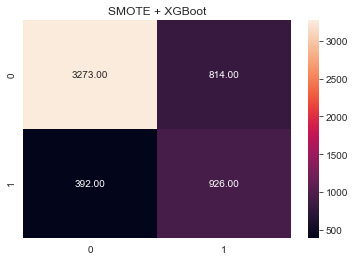

              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84      4087
         1.0       0.53      0.70      0.61      1318

    accuracy                           0.78      5405
   macro avg       0.71      0.75      0.73      5405
weighted avg       0.81      0.78      0.79      5405

Accuracy:0.78
Training score:0.83
F1 score:0.61
Recall:0.70
AUC:0.80
Times:2.38


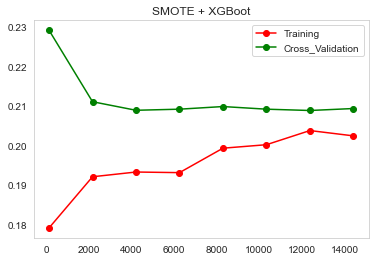

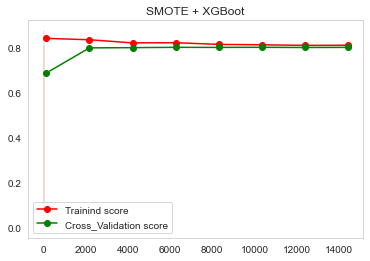

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.785754,0.614770,0.701062,0.799961,7.153437
TomekLinks + Random Forest,0.793525,0.597693,0.628983,0.799828,2.804947
SMOTEENN + Random Forest,0.752821,0.601670,0.765554,0.795784,3.556024
SMOTE + Bagging,0.783904,0.501281,0.445372,0.792113,1.780701
Tomeklink + Bagging,0.783719,0.495903,0.436267,0.796361,5.382188
SMOTEENN + Bagging,0.781314,0.611950,0.707132,0.795284,12.966343
SMOTE + Gradient Boosting,0.782979,0.600341,0.668437,0.797842,4.689654
Tomeklink + Gradient Boosting,0.797040,0.606104,0.640364,0.801555,6.656105
SMOTEENN + Gradient Boosting,0.766883,0.609907,0.747344,0.796831,9.039454
SMOTE + XGBoot,0.776873,0.605625,0.702580,0.797079,2.378335


In [225]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTE(random_state=111).fit_resample(x_train,y_train)
model=XGBClassifier(n_estimators=465,max_depth=3,colsample_bytree=0.8,subsample=0.9,gamma=4,learning_rate=0.01,random_state=111)
title='SMOTE + XGBoot'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
xgb_tomeklinks_pipe=make_pipeline(TomekLinks(),XGBClassifier())
xgb_tomeklinks_optimal=RandomizedSearchCV(xgb_tomeklinks_pipe,xgb_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
xgb_tomeklinks_optimal.fit(x_train,y_train)
print(xgb_tomeklinks_optimal.best_params_)
print(xgb_tomeklinks_optimal.best_score_)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:51:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'xgbclassifier__colsample_bytree': 1, 'xgbclassifier__gamma': 0.7, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 6, 'xgbclassifier__n_estimators': 978, 'xgbclassifier__random_state': 111, 'xgbclassifier__subsample': 0.9}
0.8018342077866996


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


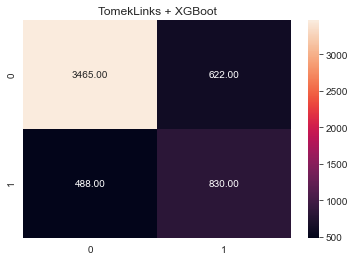

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      4087
         1.0       0.57      0.63      0.60      1318

    accuracy                           0.79      5405
   macro avg       0.72      0.74      0.73      5405
weighted avg       0.80      0.79      0.80      5405

Accuracy:0.79
Training score:0.82
F1 score:0.60
Recall:0.63
AUC:0.80
Times:2.90


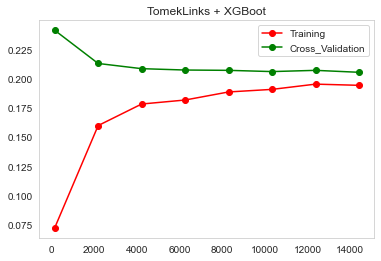

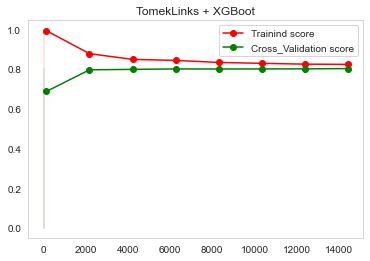

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.785754,0.614770,0.701062,0.799961,7.153437
TomekLinks + Random Forest,0.793525,0.597693,0.628983,0.799828,2.804947
SMOTEENN + Random Forest,0.752821,0.601670,0.765554,0.795784,3.556024
SMOTE + Bagging,0.783904,0.501281,0.445372,0.792113,1.780701
Tomeklink + Bagging,0.783719,0.495903,0.436267,0.796361,5.382188
SMOTEENN + Bagging,0.781314,0.611950,0.707132,0.795284,12.966343
SMOTE + Gradient Boosting,0.782979,0.600341,0.668437,0.797842,4.689654
Tomeklink + Gradient Boosting,0.797040,0.606104,0.640364,0.801555,6.656105
SMOTEENN + Gradient Boosting,0.766883,0.609907,0.747344,0.796831,9.039454
SMOTE + XGBoot,0.776873,0.605625,0.702580,0.797079,2.378335


In [226]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=TomekLinks().fit_resample(x_train,y_train)
model=XGBClassifier(n_estimators=978,max_depth=3,colsample_bytree=1,subsample=0.9,gamma=0.7,learning_rate=0.01,random_state=111)
title='TomekLinks + XGBoot'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
xgb_smoteenn_pipe=make_pipeline(SMOTEENN(random_state=111),XGBClassifier())
xgb_smoteenn_optimal=RandomizedSearchCV(xgb_smoteenn_pipe,xgb_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
xgb_smoteenn_optimal.fit(x_train,y_train)
print(xgb_smoteenn_optimal.best_params_)
print(xgb_smoteenn_optimal.best_score_)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:17:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'xgbclassifier__colsample_bytree': 1, 'xgbclassifier__gamma': 8, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 5, 'xgbclassifier__n_estimators': 484, 'xgbclassifier__random_state': 111, 'xgbclassifier__subsample': 0.5}
0.7946944212113313


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:48:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


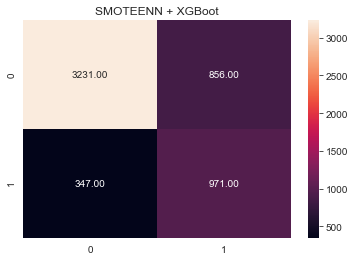

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      4087
         1.0       0.53      0.74      0.62      1318

    accuracy                           0.78      5405
   macro avg       0.72      0.76      0.73      5405
weighted avg       0.81      0.78      0.79      5405

Accuracy:0.78
Training score:0.95
F1 score:0.62
Recall:0.74
AUC:0.80
Times:2.03


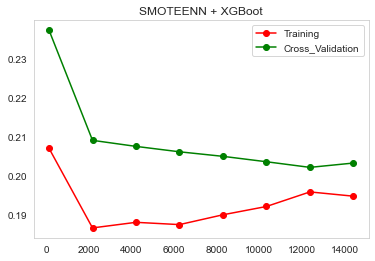

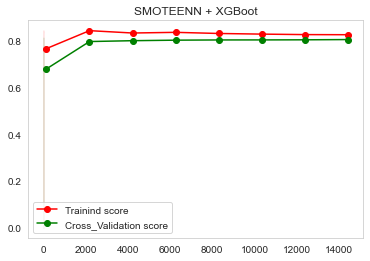

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.785754,0.614770,0.701062,0.799961,7.153437
TomekLinks + Random Forest,0.793525,0.597693,0.628983,0.799828,2.804947
SMOTEENN + Random Forest,0.752821,0.601670,0.765554,0.795784,3.556024
SMOTE + Bagging,0.783904,0.501281,0.445372,0.792113,1.780701
Tomeklink + Bagging,0.783719,0.495903,0.436267,0.796361,5.382188
SMOTEENN + Bagging,0.781314,0.611950,0.707132,0.795284,12.966343
SMOTE + Gradient Boosting,0.782979,0.600341,0.668437,0.797842,4.689654
Tomeklink + Gradient Boosting,0.797040,0.606104,0.640364,0.801555,6.656105
SMOTEENN + Gradient Boosting,0.766883,0.609907,0.747344,0.796831,9.039454
SMOTE + XGBoot,0.776873,0.605625,0.702580,0.797079,2.378335


In [227]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTEENN(random_state=111).fit_resample(x_train,y_train)
model=XGBClassifier(n_estimators=484,max_depth=4,colsample_bytree=1,subsample=0.7,gamma=8,learning_rate=0.05,random_state=111)
title='SMOTEENN + XGBoot'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

In [168]:
lgb_params={
    'lgbmclassifier__boosting_type':['gbdt','rf'],
    'lgbmclassifier__subsample':[0.5,0.6,0.7,0.8,0.9,1.0],
    'lgbmclassifier__n_estimators':randint(100,1000),
    'lgbmclassifier__max_depth':randint(3,20),
    'lgbmclassifier__num_leaves':randint(1,100),
    'lgbmclassifier__feature_fraction':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'lgbmclassifier__bagging_fraction':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'lgbmclassifier__bagging_freq':randint(0,10),
    'lgbmclassifier__lambda_l1':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'lgbmclassifier__lambda_l2':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'lgbmclassifier__learning_rate':[0.01,0.03,0.05,0.07,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
}
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
lgbm_model=lgb.LGBMClassifier()
lgbm_smote_pipe=make_pipeline(SMOTE(random_state=111),lgbm_model)
lgbm_smote_optimal=RandomizedSearchCV(lgbm_smote_pipe,lgb_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
lgbm_smote_optimal.fit(x_train,y_train)
print(lgbm_smote_optimal.best_params_)
print(lgbm_smote_optimal.best_score_)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=0.8 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
{'lgbmclassifier__bagging_fraction': 1.0, 'lgbmclassifier__bagging_freq': 2, 'lgbmclassifier__boosting_type': 'gbdt', 'lgbmclassifier__feature_fraction': 0.6, 'lgbmclassifier__lambda_l1': 0, 'lgbmclassifier__lambda_l2': 0.7, 'lgbmclassifier__learning_rate': 0.03, 'lgbmclassifier__max_depth': 7, 'lgbmclassifier__n_estimators': 523, 'lgbmclassifier__num_leaves': 80, 'lgbmclassifier__subsample': 0.8}
0.8006818528019363


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=0.8 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


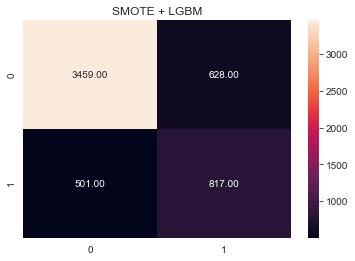

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      4087
         1.0       0.57      0.62      0.59      1318

    accuracy                           0.79      5405
   macro avg       0.72      0.73      0.73      5405
weighted avg       0.80      0.79      0.79      5405

Accuracy:0.79
Training score:0.86
F1 score:0.59
Recall:0.62
AUC:0.80
Times:0.39


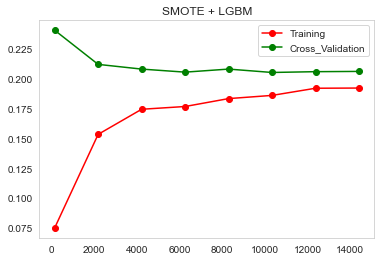

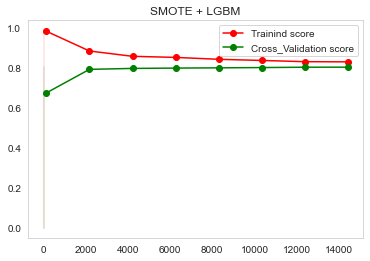

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.785754,0.614770,0.701062,0.799961,7.153437
TomekLinks + Random Forest,0.793525,0.597693,0.628983,0.799828,2.804947
SMOTEENN + Random Forest,0.752821,0.601670,0.765554,0.795784,3.556024
SMOTE + Bagging,0.783904,0.501281,0.445372,0.792113,1.780701
Tomeklink + Bagging,0.783719,0.495903,0.436267,0.796361,5.382188
SMOTEENN + Bagging,0.781314,0.611950,0.707132,0.795284,12.966343
SMOTE + Gradient Boosting,0.782979,0.600341,0.668437,0.797842,4.689654
Tomeklink + Gradient Boosting,0.797040,0.606104,0.640364,0.801555,6.656105
SMOTEENN + Gradient Boosting,0.766883,0.609907,0.747344,0.796831,9.039454
SMOTE + XGBoot,0.776873,0.605625,0.702580,0.797079,2.378335


In [228]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTE(random_state=111).fit_resample(x_train,y_train)
model=lgb.LGBMClassifier(boosting_type='gbdt',subsample=0.8,n_estimators=523,
                         max_depth=3,bagging_fraction=1.0,
                         bagging_freq=2,feature_fraction=0.8,
                         lambda_l1=0,lambda_l2=0.7,
                         learning_rate=0.03,num_leaves=80)
title='SMOTE + LGBM'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

In [174]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=TomekLinks().fit_resample(x_train,y_train)
lgbm_model=lgb.LGBMClassifier()
lgbm_tomeklinks_pipe=make_pipeline(TomekLinks(),lgbm_model)
lgbm_tomeklinks_optimal=RandomizedSearchCV(lgbm_tomeklinks_pipe,lgb_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
lgbm_tomeklinks_optimal.fit(x_train,y_train)
print(lgbm_tomeklinks_optimal.best_params_)
print(lgbm_tomeklinks_optimal.best_score_)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=0.9 will be ignored. Current value: bagging_fraction=0.3
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
{'lgbmclassifier__bagging_fraction': 0.3, 'lgbmclassifier__bagging_freq': 4, 'lgbmclassifier__boosting_type': 'rf', 'lgbmclassifier__feature_fraction': 0.6, 'lgbmclassifier__lambda_l1': 0.2, 'lgbmclassifier__lambda_l2': 0, 'lgbmclassifier__learning_rate': 0.07, 'lgbmclassifier__max_depth': 7, 'lgbmclassifier__n_estimators': 200, 'lgbmclassifier__num_leaves': 48, 'lgbmclassifier__subsample': 0.9}
0.7996436625373918


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=0.9 will be ignored. Current value: bagging_fraction=0.3
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


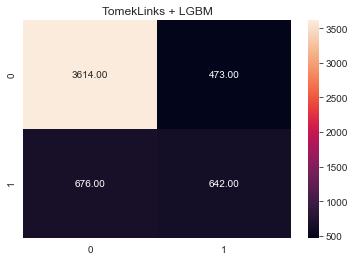

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      4087
         1.0       0.58      0.49      0.53      1318

    accuracy                           0.79      5405
   macro avg       0.71      0.69      0.70      5405
weighted avg       0.78      0.79      0.78      5405

Accuracy:0.79
Training score:0.81
F1 score:0.53
Recall:0.49
AUC:0.80
Times:0.41


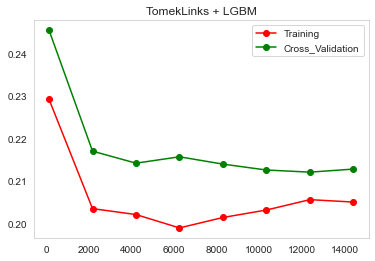

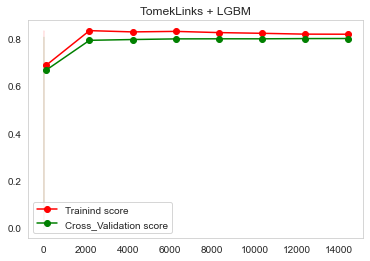

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.785754,0.614770,0.701062,0.799961,7.153437
TomekLinks + Random Forest,0.793525,0.597693,0.628983,0.799828,2.804947
SMOTEENN + Random Forest,0.752821,0.601670,0.765554,0.795784,3.556024
SMOTE + Bagging,0.783904,0.501281,0.445372,0.792113,1.780701
Tomeklink + Bagging,0.783719,0.495903,0.436267,0.796361,5.382188
SMOTEENN + Bagging,0.781314,0.611950,0.707132,0.795284,12.966343
SMOTE + Gradient Boosting,0.782979,0.600341,0.668437,0.797842,4.689654
Tomeklink + Gradient Boosting,0.797040,0.606104,0.640364,0.801555,6.656105
SMOTEENN + Gradient Boosting,0.766883,0.609907,0.747344,0.796831,9.039454
SMOTE + XGBoot,0.776873,0.605625,0.702580,0.797079,2.378335


In [229]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=TomekLinks().fit_resample(x_train,y_train)
form=model=lgb.LGBMClassifier(boosting_type='rf',subsample=0.9,n_estimators=200,
                         max_depth=7,bagging_fraction=0.3,
                         bagging_freq=4,feature_fraction=0.6,
                         lambda_l1=0.2,lambda_l2=0,
                         learning_rate=0.07,num_leaves=48)
title='TomekLinks + LGBM'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

In [ ]:
#from hyperopt import hp,fmin,STATUS_OK,tpe
#def grad_smote_optimal(params):
#    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
#    x_res,y_res=SMOTE(random_state=111).fit_resample(x_train,y_train)
#    lgbm=lgb.LGBMClassifier(**params)
#    acc=cross_val_score(lgbm,x_res,y_res,n_jobs=-1,error_score='raise').mean()
#    return {'loss':-acc,'status':STATUS_OK}
    
#smote_lgbm_space=hp.choice('classifier',[
#    {
#        'boosting_type':hp.choice('boosting_type',['gbdt','rf']),
#        'subsample':hp.uniform('subsample',0.5,1.0),
#        'n_estimators':hp.choice('n_estimators',range(100,1000)),
#        'max_depth':hp.choice('max_depth',range(3,20)),
#        'num_leaves':hp.choice('num_leaves',range(1,100)),
#        'feature_fraction':hp.uniform('feature_fraction',0.0,1.0),
#        'bagging_fraction':hp.uniform('bagging_fraction',0.0,1.0),
#        'bagging_freq':hp.choice('bagging_freq',range(0,10)),
#        'lambda_l1':hp.uniform('lambda_l1',0.0,1.0),
#        'lambda_l2':hp.uniform('lambda_l2',0.0,1.0),
#        'learning_rate':hp.loguniform('learning_rate',np.log(0.01),np.log(1.0))
#    }
#])

#best=fmin(grad_smote_optimal,smote_lgbm_space,algo=tpe.suggest,max_evals=50)
#print('best:',best)

In [176]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTEENN(random_state=111).fit_resample(x_train,y_train)
lgbm_model=lgb.LGBMClassifier()
lgbm_smoteenn_pipe=make_pipeline(SMOTEENN(random_state=111),lgbm_model)
lgbm_smoteenn_optimal=RandomizedSearchCV(lgbm_smoteenn_pipe,lgb_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
lgbm_smoteenn_optimal.fit(x_train,y_train)
print(lgbm_smoteenn_optimal.best_params_)
print(lgbm_smoteenn_optimal.best_score_)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=0.9 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=0.6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
{'lgbmclassifier__bagging_fraction': 0.9, 'lgbmclassifier__bagging_freq': 3, 'lgbmclassifier__boosting_type': 'gbdt', 'lgbmclassifier__feature_fraction': 0.7, 'lgbmclassifier__lambda_l1': 1, 'lgbmclassifier__lambda_l2': 0.6, 'lgbmclassifier__learning_rate': 0.03, 'lgbmclassifier__max_depth': 16, 'lgbmclassifier__n_estimators': 333, 'lgbmclassifier__num_leaves': 57, 'lgbmclassifier__subsample': 0.9}
0.7937430903200997


[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=0.9 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=0.6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


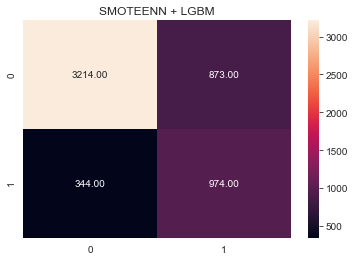

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      4087
         1.0       0.53      0.74      0.62      1318

    accuracy                           0.77      5405
   macro avg       0.72      0.76      0.73      5405
weighted avg       0.81      0.77      0.79      5405

Accuracy:0.77
Training score:0.94
F1 score:0.62
Recall:0.74
AUC:0.80
Times:0.20


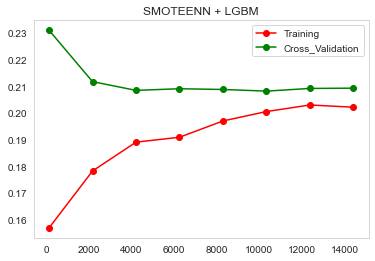

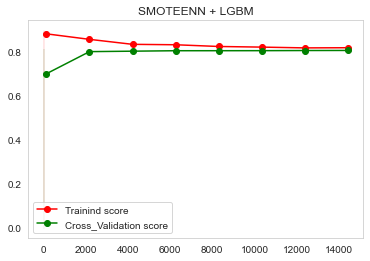

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.785754,0.614770,0.701062,0.799961,7.153437
TomekLinks + Random Forest,0.793525,0.597693,0.628983,0.799828,2.804947
SMOTEENN + Random Forest,0.752821,0.601670,0.765554,0.795784,3.556024
SMOTE + Bagging,0.783904,0.501281,0.445372,0.792113,1.780701
Tomeklink + Bagging,0.783719,0.495903,0.436267,0.796361,5.382188
SMOTEENN + Bagging,0.781314,0.611950,0.707132,0.795284,12.966343
SMOTE + Gradient Boosting,0.782979,0.600341,0.668437,0.797842,4.671258
Tomeklink + Gradient Boosting,0.797040,0.606104,0.640364,0.801555,6.656105
SMOTEENN + Gradient Boosting,0.766883,0.609907,0.747344,0.796831,9.039454
SMOTE + XGBoot,0.776873,0.605625,0.702580,0.797079,2.378335


In [235]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTEENN(random_state=111).fit_resample(x_train,y_train)
model=lgb.LGBMClassifier(boosting_type='gbdt',subsample=0.9,n_estimators=333,
                         max_depth=3,bagging_fraction=0.9,
                         bagging_freq=3,feature_fraction=0.3,
                         lambda_l1=1,lambda_l2=0.6,
                         learning_rate=0.03,num_leaves=57)
title='SMOTEENN + LGBM'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

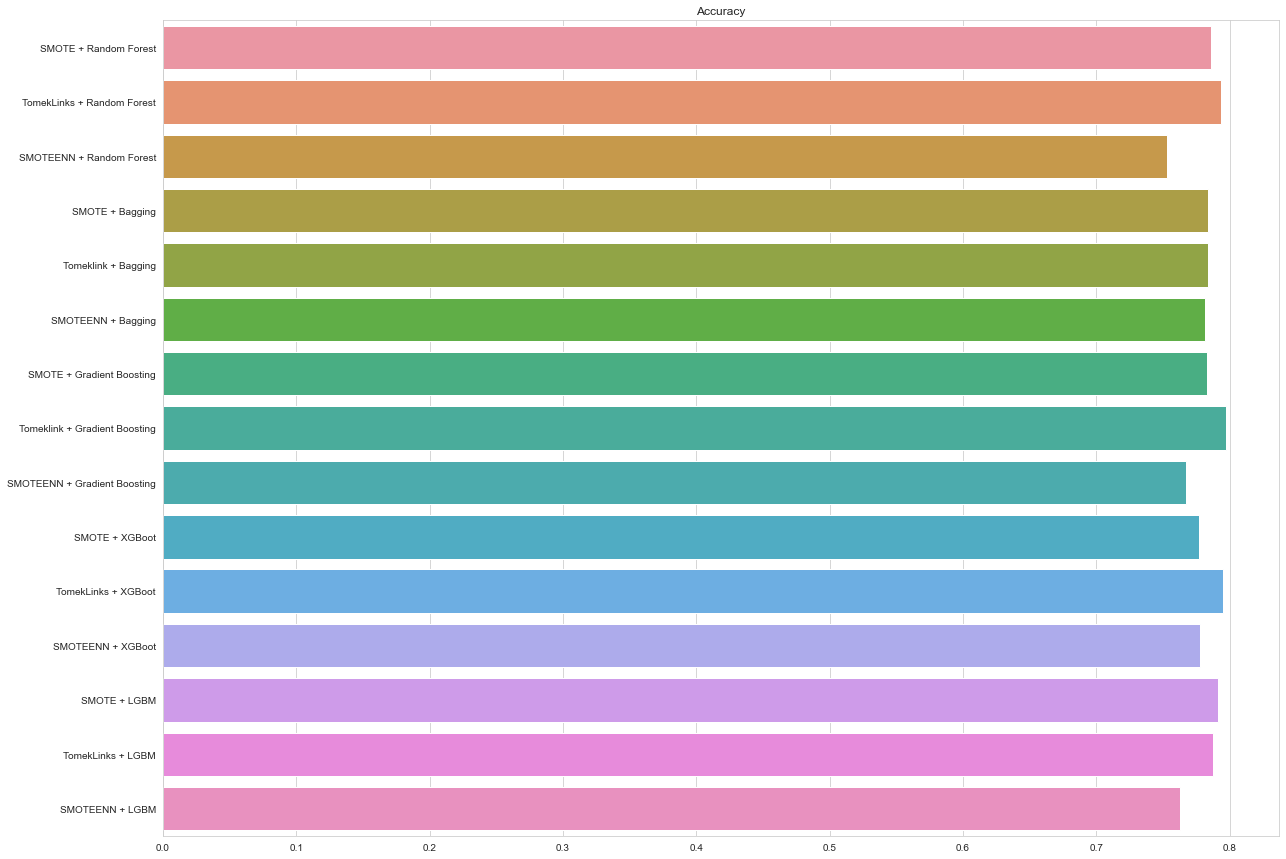

In [184]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,15))
sns.barplot(x=list(accuracy.values()),y=list(accuracy.keys()))
plt.title('Accuracy')
plt.show()

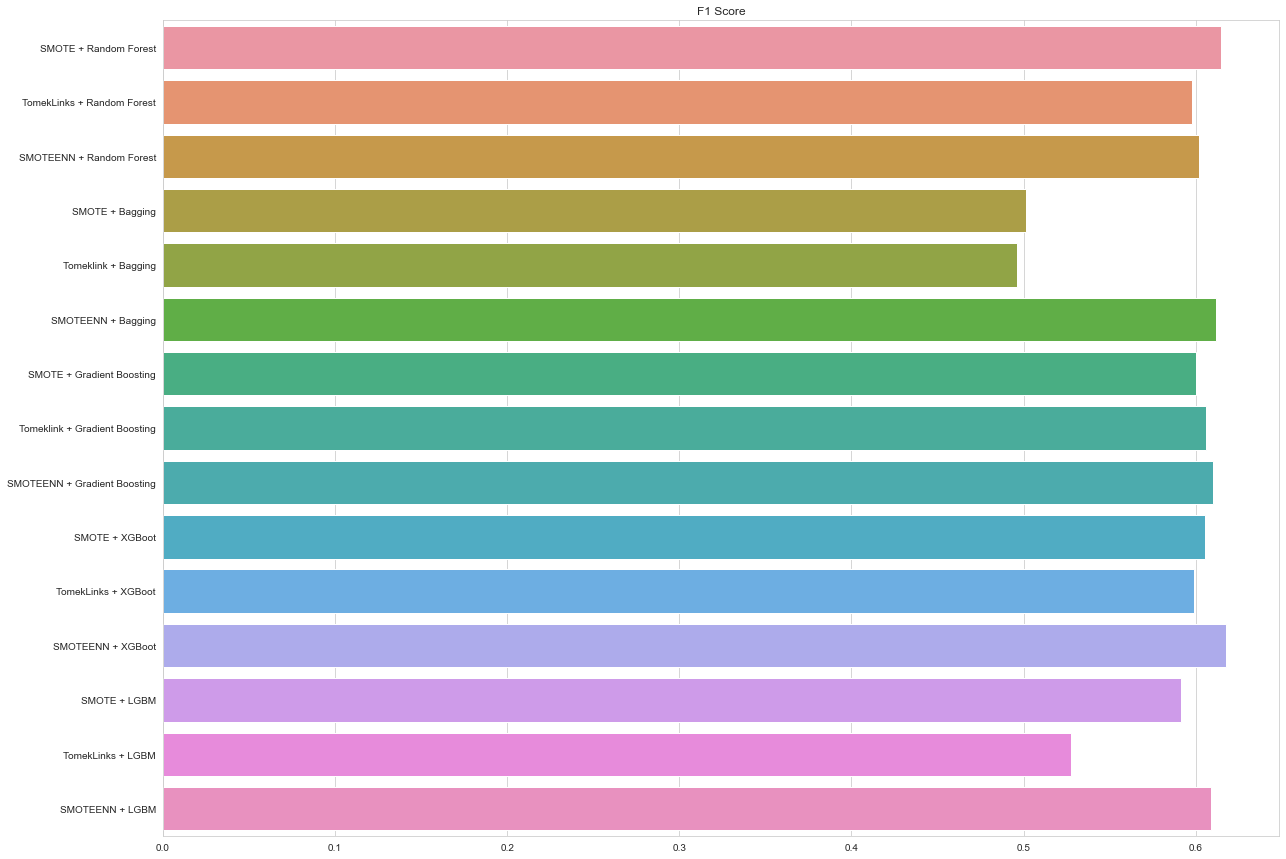

In [185]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,15))
sns.barplot(x=list(f1.values()),y=list(f1.keys()))
plt.title('F1 Score')
plt.show()

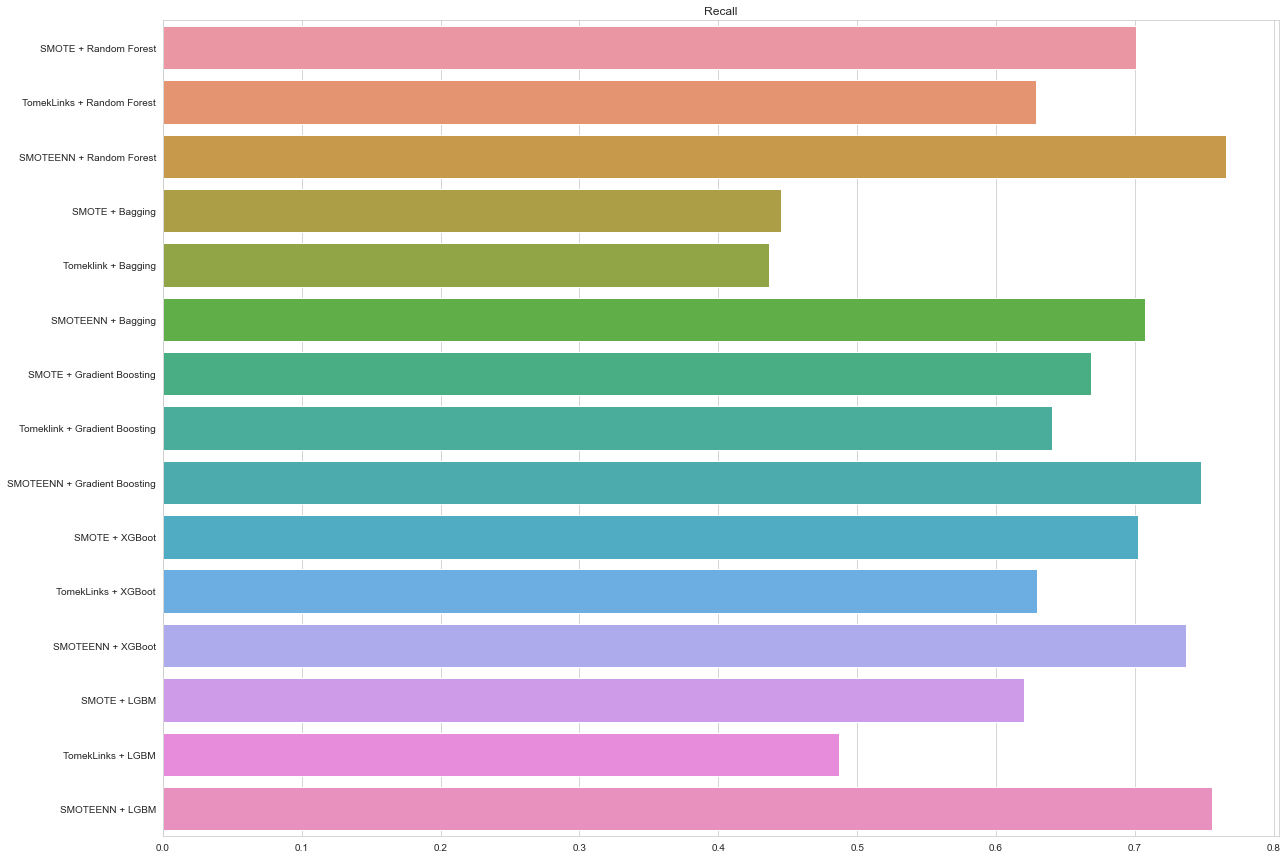

In [186]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,15))
sns.barplot(x=list(recall.values()),y=list(recall.keys()))
plt.title('Recall')
plt.show()

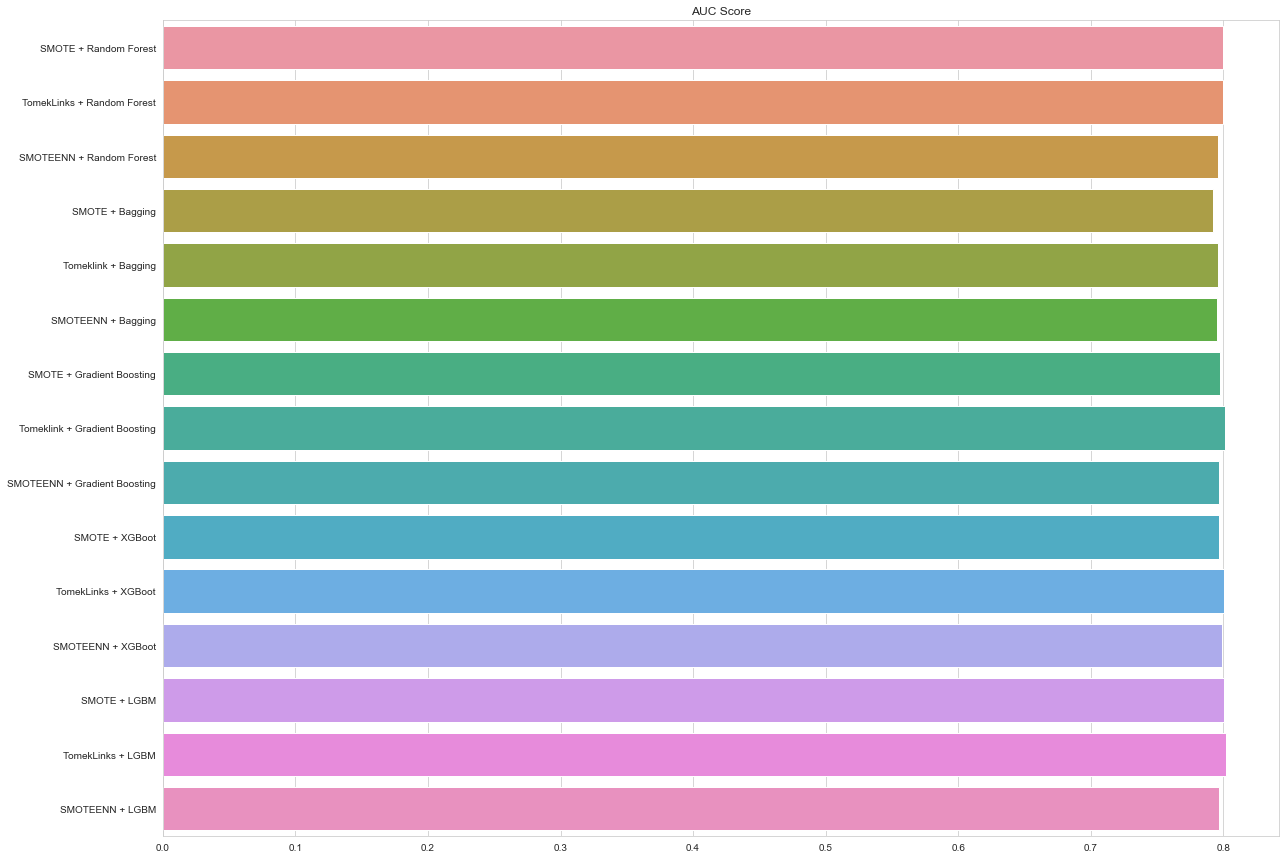

In [187]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,15))
sns.barplot(x=list(auc.values()),y=list(auc.keys()))
plt.title('AUC Score')
plt.show()

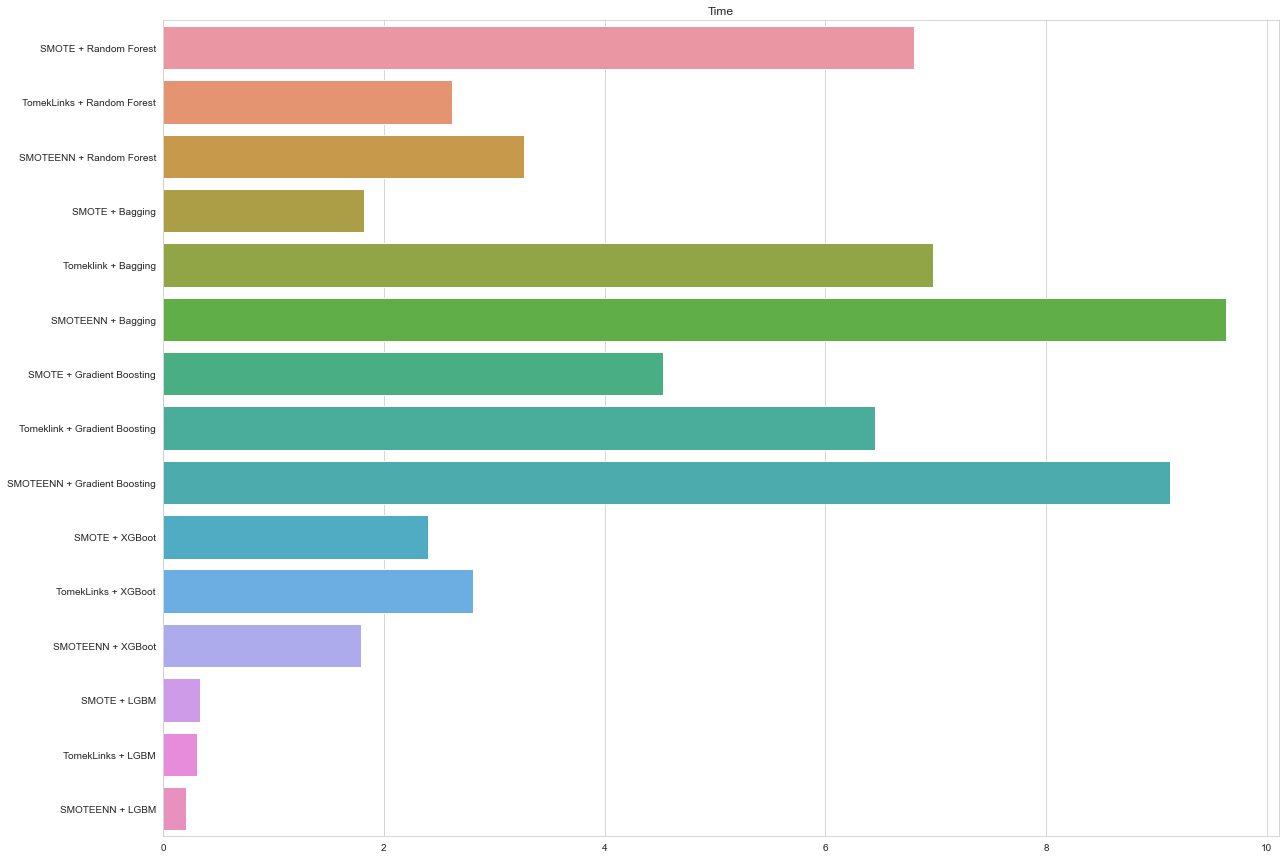

In [188]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,15))
sns.barplot(x=list(speed.values()),y=list(speed.keys()))
plt.title('Time')
plt.show()

In [285]:
test_dataset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,78,0.827,0.0,1,2.0,2.0,0.0,9.0,0.0,NaN,1.0,21
1,9858,5,0.920,1.0,1,0.0,2.0,0.0,5.0,NaN,0.0,1.0,98
2,31806,64,0.624,0.0,0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,15
3,27385,26,0.827,0.0,1,0.0,3.0,0.0,11.0,1.0,0.0,1.0,39
4,27724,5,0.920,0.0,1,0.0,2.0,0.0,21.0,7.0,0.0,5.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,5,0.920,0.0,0,0.0,2.0,3.0,16.0,NaN,1.0,4.0,15
2125,195,30,0.897,0.0,1,0.0,3.0,0.0,18.0,NaN,NaN,2.0,30
2126,31762,2,0.887,0.0,0,0.0,0.0,NaN,3.0,NaN,0.0,0.0,18
2127,7873,4,0.804,0.0,1,2.0,1.0,NaN,7.0,3.0,1.0,1.0,84


In [286]:
def fillna(columns):
    test_dataset[columns].fillna(test_dataset[columns].mode()[0],inplace=True)
col=['gender','enrolled_university','education_level','major_discipline',
    'experience','company_size','company_type','last_new_job']
for i in col:
    fillna(i)

In [287]:
test_dataset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,78,0.827,0.0,1,2.0,2.0,0.0,9.0,0.0,0.0,1.0,21
1,9858,5,0.920,1.0,1,0.0,2.0,0.0,5.0,2.0,0.0,1.0,98
2,31806,64,0.624,0.0,0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,15
3,27385,26,0.827,0.0,1,0.0,3.0,0.0,11.0,1.0,0.0,1.0,39
4,27724,5,0.920,0.0,1,0.0,2.0,0.0,21.0,7.0,0.0,5.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,5,0.920,0.0,0,0.0,2.0,3.0,16.0,2.0,1.0,4.0,15
2125,195,30,0.897,0.0,1,0.0,3.0,0.0,18.0,2.0,0.0,2.0,30
2126,31762,2,0.887,0.0,0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,18
2127,7873,4,0.804,0.0,1,2.0,1.0,0.0,7.0,3.0,1.0,1.0,84


In [288]:
test_x=test_dataset.iloc[:,1:13]
sd=StandardScaler().fit(test_x)
test_x=sd.fit_transform(test_x)
print(test_x.mean())
print(test_x.std())

-7.707419588520345e-17
1.0


In [290]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTEENN(random_state=111).fit_resample(x_train,y_train)
clf=XGBClassifier(n_estimators=484,max_depth=4,colsample_bytree=1,subsample=0.7,gamma=8,learning_rate=0.05,random_state=111)
clf.fit(x_res,y_res)
predict=clf.predict_proba(test_dataset.drop(['enrollee_id'],axis=1))[:,1]
#predict=clf.predict(test_dataset.drop(['enrollee_id'],axis=1))
subssion=pd.DataFrame({'enrollee_id':test_dataset['enrollee_id'],
                      'target':predict})
subssion

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,enrollee_id,target
0,32403,0.334552
1,9858,0.079457
2,31806,0.971379
3,27385,0.119696
4,27724,0.049665
...,...,...
2124,1289,0.183229
2125,195,0.046004
2126,31762,0.040825
2127,7873,0.092330
